In [1]:
import pandas as pd
import time
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
def clean_data(file):
    df = pd.read_csv(file)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index("Date")
    df.drop(['High','Low', 'Adj Close', 'Volume'], inplace = True, axis = 1)
    
    train5Y = df.loc[datetime.date(2014,1,1): datetime.date(2018,12,31)]
    train10Y = df.loc[datetime.date(2009,1,1): datetime.date(2018,12,31)]
    test1M = df.loc[datetime.date(2019,1,1): datetime.date(2019,1,31)]
    test6M = df.loc[datetime.date(2019,1,1): datetime.date(2019,6,30)]
    
    return train5Y, train10Y, test1M, test6M

KO_train5, KO_train10, KO_test1, KO_test6 = clean_data("KO.csv")
AMD_train5, AMD_train10, AMD_test1, AMD_test6 = clean_data("AMD.csv")

KO_trains = [KO_train10, KO_train5]
KO_tests = [KO_test1, KO_test6]
AMD_trains = [AMD_train10, AMD_train5]
AMD_tests = [AMD_test1, AMD_test6]

In [3]:
def plot_pred(test, pred, period, title):
    fig, ax = plt.subplots(figsize=(20, 8))
    #fig.suptitle(title, fontsize=16)
    plt.title(title)
    ax.plot(test.index, pred, label = "Predicted Prices")
    ax.plot(test.index, np.array(test), label = "Actual Prices")
    ax.legend()
    if period == 1:
        ax.set_xlim([datetime.date(2019, 1, 1), datetime.date(2019, 2, 1)])
    else: 
        ax.set_xlim([datetime.date(2019, 1, 1), datetime.date(2019, 7, 1)])
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
        ax.tick_params(axis='x', labelrotation=0)

In [4]:
def split_label(data):
    return data.drop('Close', axis = 1), data['Close']

# Performance Metrics

In [5]:
def mape(y_actual, y_pred):
    y_actual_arr = np.array(y_actual)
    y_pred_arr = np.array(y_pred)
    
    return np.mean(np.abs((y_actual_arr - y_pred_arr)/y_actual_arr))*100

def rmse(y_actual, y_pred):
    y_actual_arr = np.array(y_actual)
    y_pred_arr = np.array(y_pred)
    
    mse = np.square(np.subtract(y_actual_arr,y_pred_arr)).mean()
    return math.sqrt(mse)

def poc(X_test, y_actual, y_pred):
    count = 0
    X_test = np.array(X_test)
    y_actual = np.array(y_actual)
    y_pred = np.array(y_pred)
    
    for i in range(len(X_test)):
        if y_actual[i] > X_test[i] and y_pred[i] > X_test[i]:
            count += 1
        elif y_actual[i] < X_test[i] and y_pred[i] < X_test[i]:
            count += 1
    
    return (count/len(X_test))*100
        

# Execution Loop

In [6]:
def run(trains, tests, model):
    y_tests = []
    y_preds = []
    rmses = []
    mapes = []
    pocs = []
    times = []
    for train in trains:
        for test in tests:
            strt = time.time()
            X_train, y_train = split_label(train)
    
            model.fit(X_train, y_train)

            X_test, y_test = split_label(test)
            y_pred = model.predict(X_test)
            
            y_preds.append(y_pred)
            y_tests.append(y_test)
            
            rmses.append(rmse(y_test, y_pred))
            mapes.append(mape(y_test, y_pred))
            pocs.append(poc(X_test, y_test, y_pred))
            times.append(time.time() - strt)
            
    return y_tests, y_preds, rmses, mapes, pocs, times

def print_perf(y_tests, y_preds, rmses, mapes, pocs, times, stock, plots = True, comp = True):
    print(stock + "\n")
    print("10Y Data - 1Mo Prediction")
    print("RMSE:", rmses[0])
    print("MAPE:", mapes[0])
    print("POC:", pocs[0])
    print("Execution Time:", times[0], "seconds \n")
    if plots:
        plot_pred(y_tests[0], y_preds[0], 1, "10Y Data - 1Mo Prediction")
    
    if comp:
        print("10Y Data - 6Mo Prediction")
        print("RMSE:", rmses[1])
        print("MAPE:", mapes[1])
        print("POC:", pocs[1])
        print("Execution Time:", times[1], "seconds \n")
        if plots:
            plot_pred(y_tests[1], y_preds[1], 6, "10Y Data - 6Mo Prediction")

        print("5Y Data - 1Mo Prediction")
        print("RMSE:", rmses[2])
        print("MAPE:", mapes[2])
        print("POC:", pocs[2])
        print("Execution Time:", times[2], "seconds \n")
        if plots:
            plot_pred(y_tests[2], y_preds[2], 1, "5Y Data - 1Mo Prediction")

        print("5Y Data - 6Mo Prediction")
        print("RMSE:", rmses[3])
        print("MAPE:", mapes[3])
        print("POC:", pocs[3])
        print("Execution Time:", times[3], "seconds \n")
        if plots:
            plot_pred(y_tests[3], y_preds[3], 6, "5Y Data - 6Mo Prediction")

# Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

### KO Stock

Coca-Cola (TICKR: KO)

10Y Data - 1Mo Prediction
RMSE: 0.4103213387063633
MAPE: 0.7139230868751448
POC: 57.14285714285714
Execution Time: 0.02927684783935547 seconds 

10Y Data - 6Mo Prediction
RMSE: 0.36424492002381115
MAPE: 0.5817698055018985
POC: 53.2258064516129
Execution Time: 0.0007452964782714844 seconds 

5Y Data - 1Mo Prediction
RMSE: 0.4121141594526035
MAPE: 0.7180505428824626
POC: 42.857142857142854
Execution Time: 0.0 seconds 

5Y Data - 6Mo Prediction
RMSE: 0.3664644330583116
MAPE: 0.5856729389276072
POC: 42.74193548387097
Execution Time: 0.0 seconds 



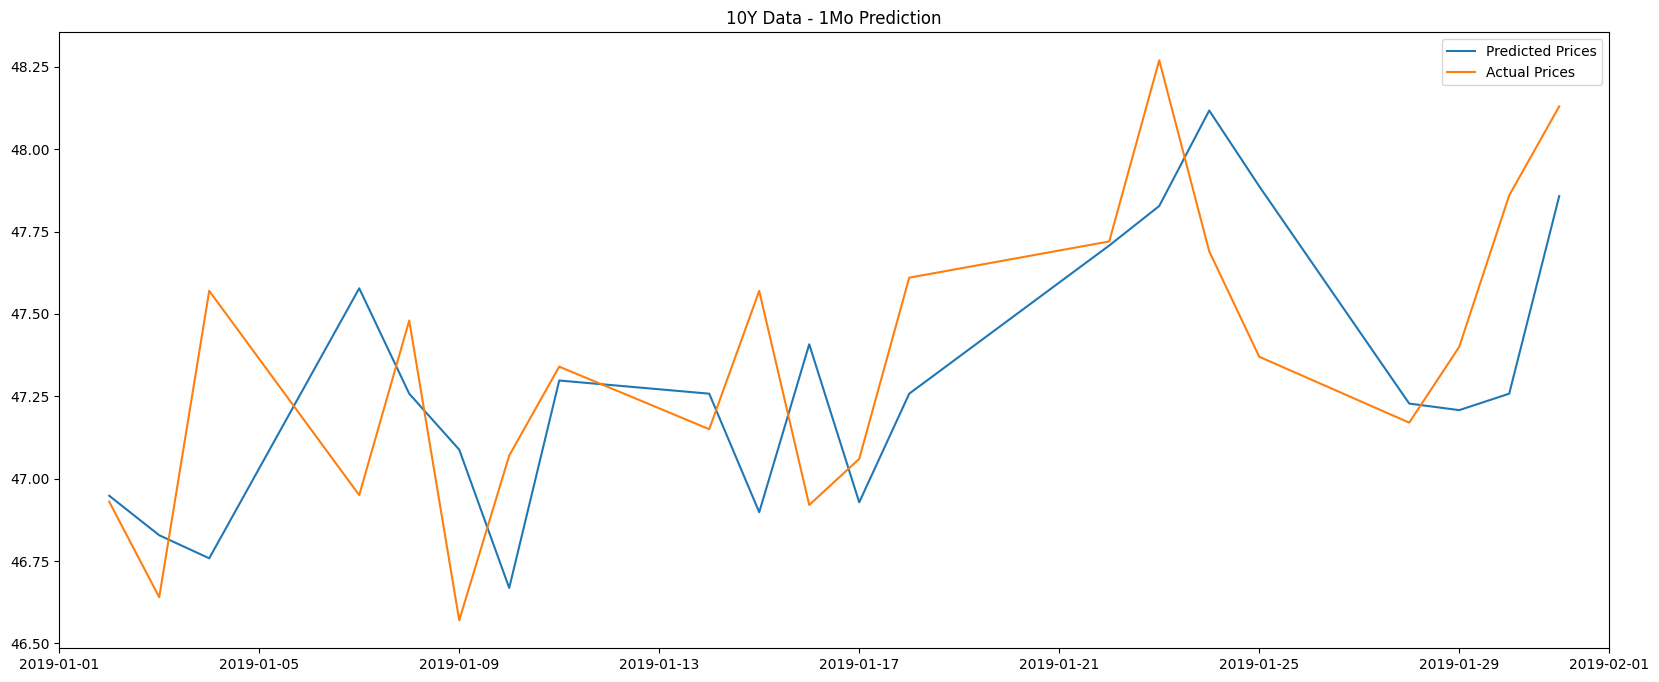

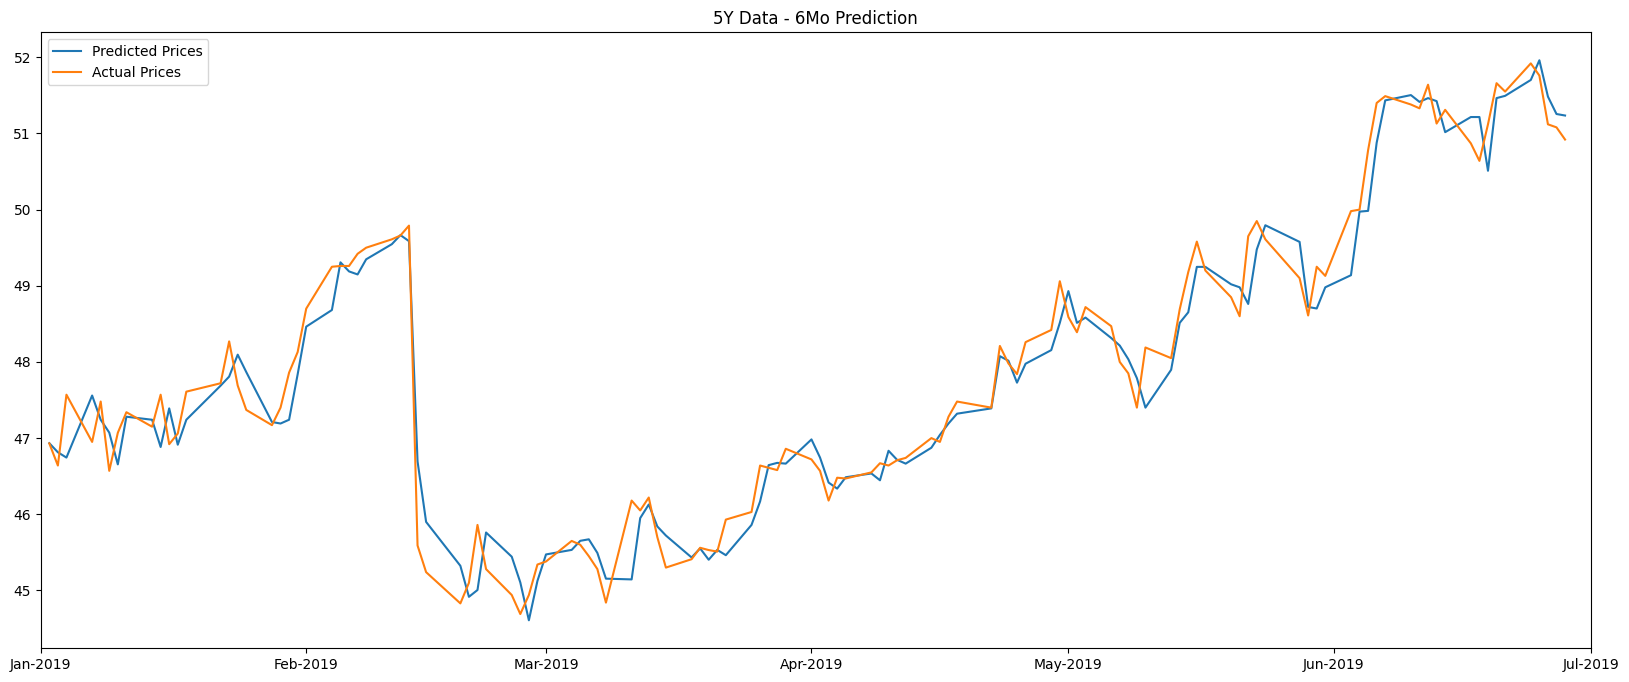

In [21]:
lr = LinearRegression()
y_tests, y_preds, rmses, mapes, pocs, times = run(KO_trains, KO_tests, lr)
print_perf(y_tests, y_preds, rmses, mapes, pocs, times, "Coca-Cola (TICKR: KO)")

### AMD Stock

Advanced Micro Devices (TICKR: KO)

10Y Data - 1Mo Prediction
RMSE: 0.8860907029675376
MAPE: 3.688393056136652
POC: 47.61904761904761
Execution Time: 0.0063245296478271484 seconds 

10Y Data - 6Mo Prediction
RMSE: 0.751831342153661
MAPE: 2.263400654927554
POC: 58.87096774193549
Execution Time: 0.007458925247192383 seconds 

5Y Data - 1Mo Prediction
RMSE: 0.886053799495942
MAPE: 3.6880118266470014
POC: 47.61904761904761
Execution Time: 0.004343986511230469 seconds 

5Y Data - 6Mo Prediction
RMSE: 0.7517013427542871
MAPE: 2.261916351722647
POC: 58.87096774193549
Execution Time: 0.0044345855712890625 seconds 



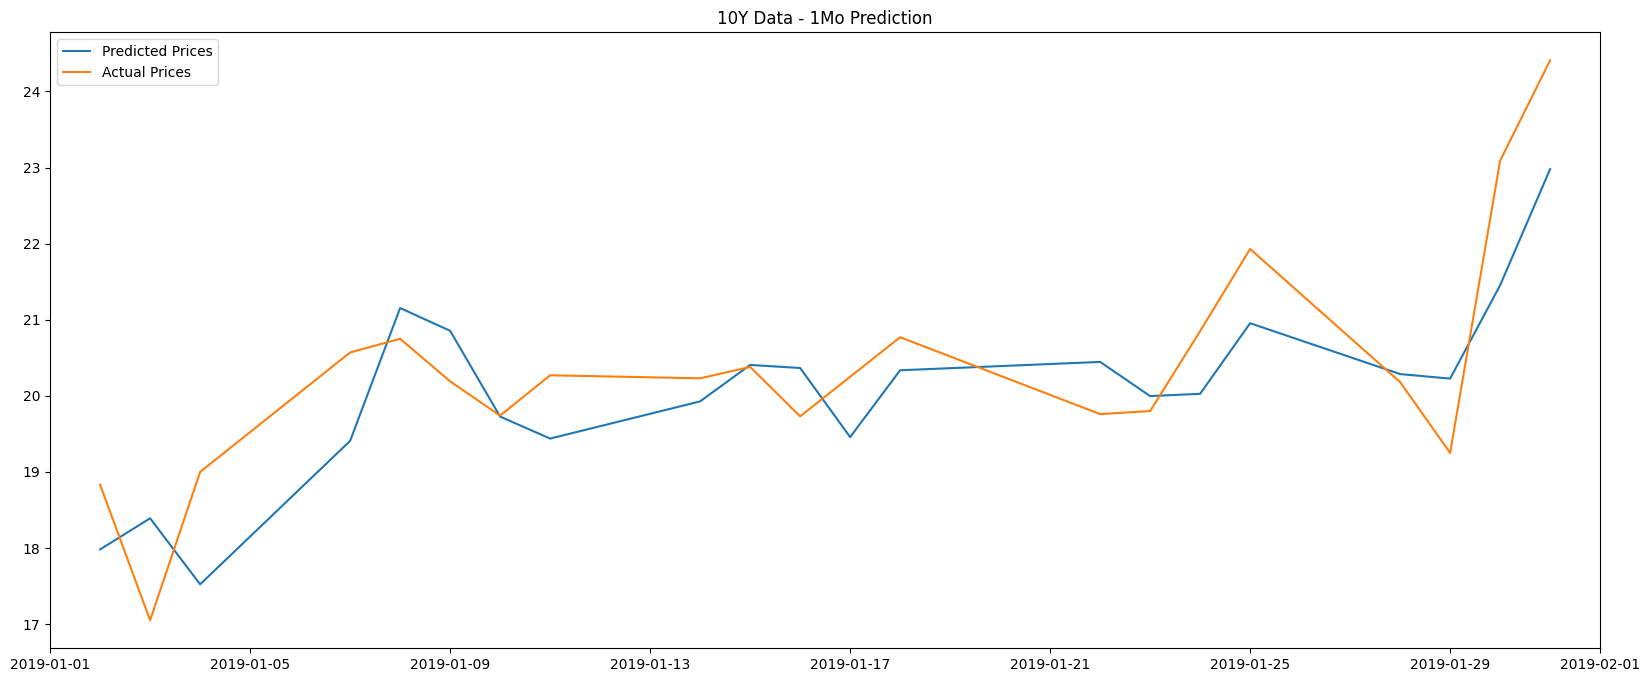

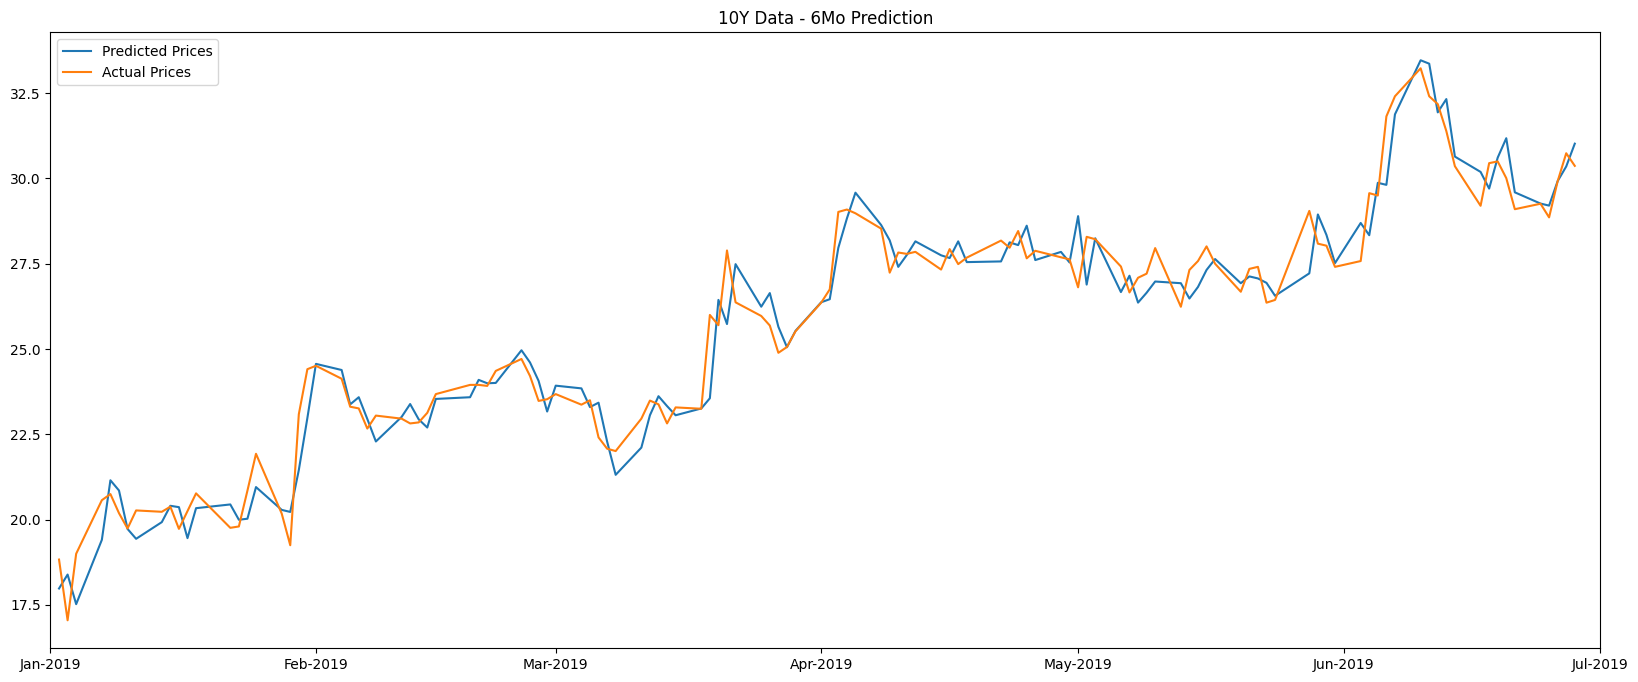

In [14]:
lr = LinearRegression()
y_tests, y_preds, rmses, mapes, pocs, times = run(AMD_trains, AMD_tests, lr)
print_perf(y_tests, y_preds, rmses, mapes, pocs, times, "Advanced Micro Devices (TICKR: KO)")

# Polynomial Regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [9]:
def poly_run(trains, tests, poly, model):
    y_tests = []
    y_preds = []
    rmses = []
    mapes = []
    pocs = []
    times = []
    for train in trains:
        for test in tests:
            strt = time.time()
            X_train, y_train = split_label(train)
    
            X_poly = poly.fit_transform(X_train)
            model.fit(X_poly, y_train)

            X_test, y_test = split_label(test)
            y_pred = model.predict(poly.fit_transform(X_test))
            
            y_preds.append(y_pred)
            y_tests.append(y_test)
            
            rmses.append(rmse(y_test, y_pred))
            mapes.append(mape(y_test, y_pred))
            pocs.append(poc(X_test, y_test, y_pred))
            times.append(time.time() - strt)
            
    return y_tests, y_preds, rmses, mapes, pocs, times

deg = [i for i in range(2, 31)]
ms = []
rs = []
ps = []
for d in deg:
    poly = PolynomialFeatures(d, include_bias = False)
    lr = LinearRegression()
    y_tests, y_preds, rmses, mapes, pocs, times = poly_run(KO_trains, KO_tests, poly, lr)
    rs.append(rmses[1])
    ps.append(pocs[1])
    ms.append(mapes[1])
    #print("Degree", d)
    #print_perf(y_tests, y_preds, rmses, mapes, pocs, times, "Coca-Cola (TICKR: KO)", plots = False, comp = False)

### KO Stock

In [15]:
plt.plot(deg, ps)
plt.title("POC for Degrees 2 to 30")
plt.xticks([0,5,10,15,20,25,30])
plt.show()

In [16]:
plt.plot(deg, rs)
plt.title("RMSE for Degrees 2 to 30")
plt.xticks([0,5,10,15,20,25,30])
plt.show()

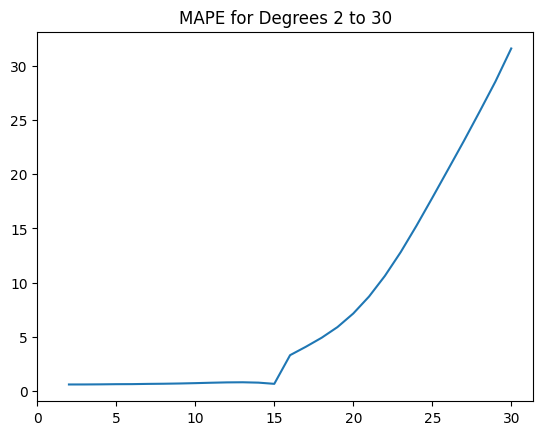

In [17]:
plt.plot(deg, ms)
plt.title("MAPE for Degrees 2 to 30")
plt.xticks([0,5,10,15,20,25,30])
plt.show()

Coca-Cola (TICKR: KO)

10Y Data - 1Mo Prediction
RMSE: 0.4098358769081105
MAPE: 0.7145562771817248
POC: 57.14285714285714
Execution Time: 0.02389812469482422 seconds 

10Y Data - 6Mo Prediction
RMSE: 0.407874277359457
MAPE: 0.6427274790084777
POC: 52.41935483870967
Execution Time: 0.022731542587280273 seconds 

5Y Data - 1Mo Prediction
RMSE: 0.41886561271323913
MAPE: 0.7275710597929262
POC: 42.857142857142854
Execution Time: 0.017588138580322266 seconds 

5Y Data - 6Mo Prediction
RMSE: 1.291409286372707
MAPE: 1.3429553113808432
POC: 53.2258064516129
Execution Time: 0.02399277687072754 seconds 



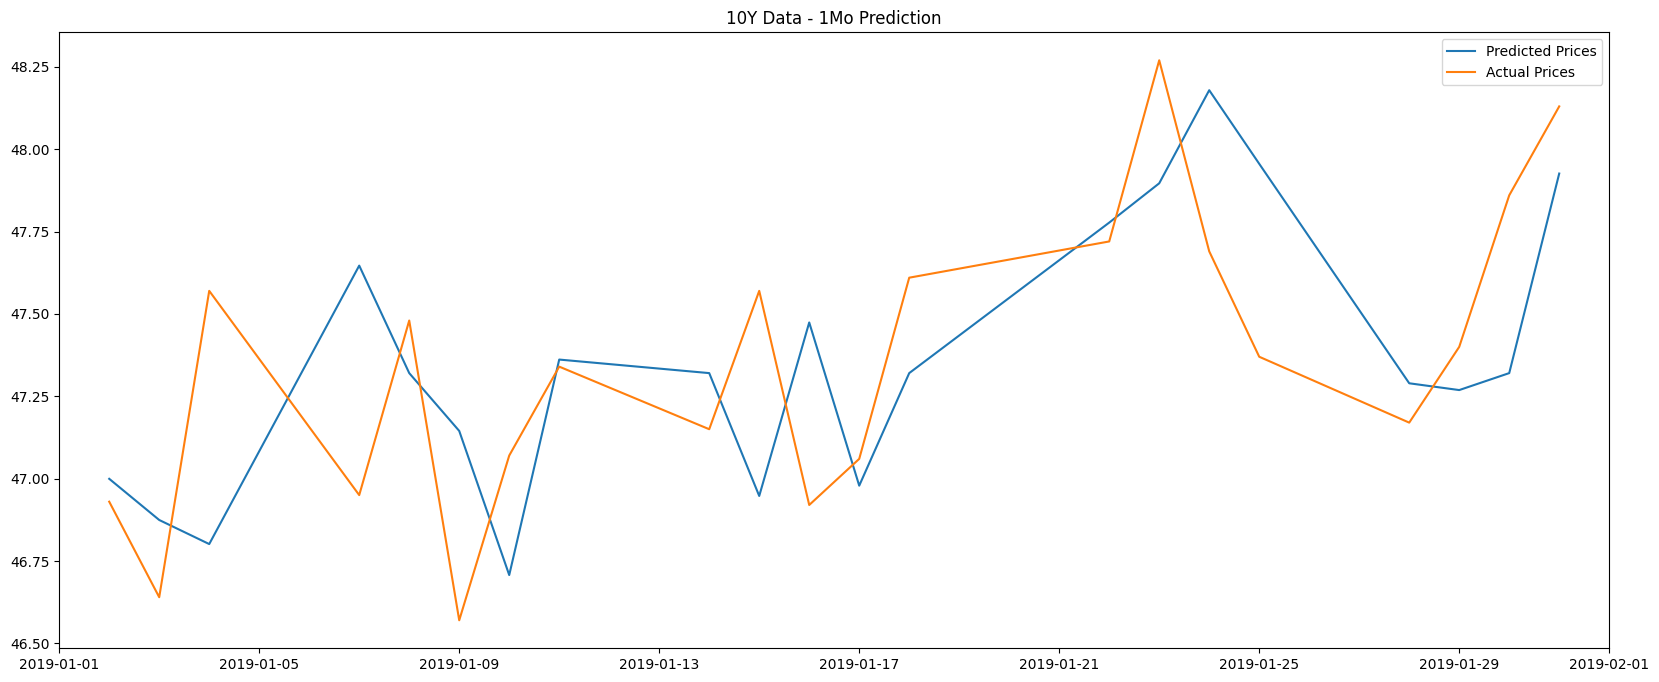

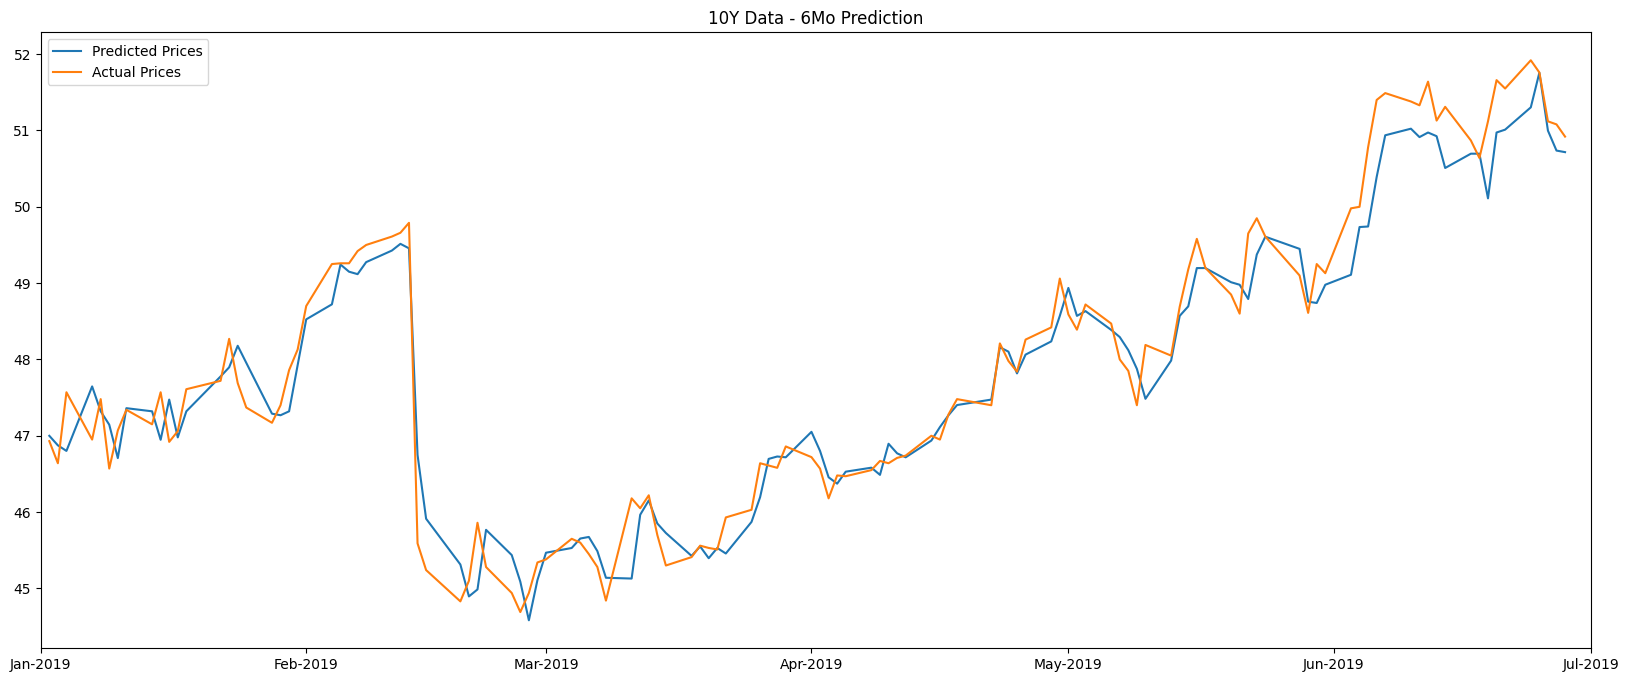

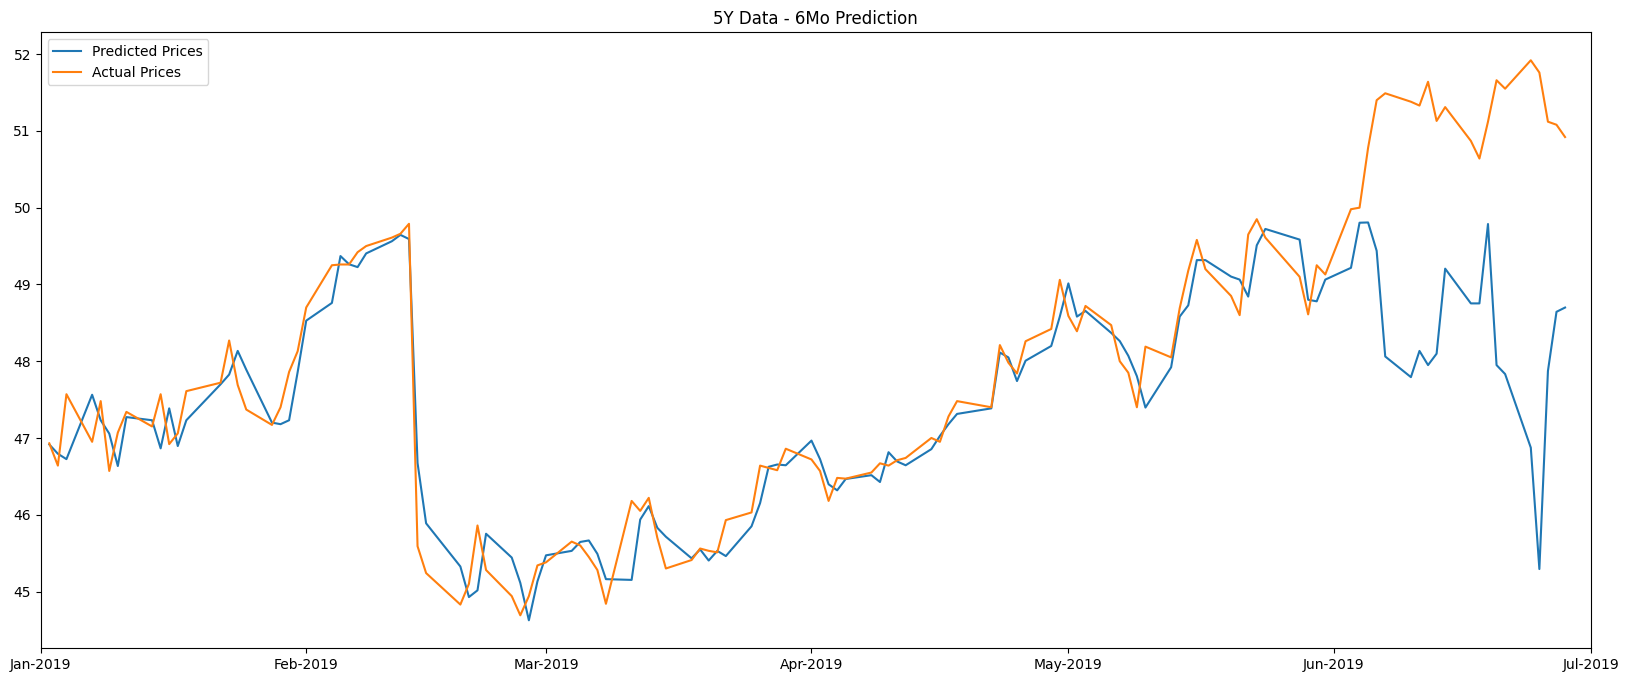

In [18]:
poly = PolynomialFeatures(15, include_bias = False)
lr = LinearRegression()
y_tests, y_preds, rmses, mapes, pocs, times = poly_run(KO_trains, KO_tests, poly, lr)
print_perf(y_tests, y_preds, rmses, mapes, pocs, times, "Coca-Cola (TICKR: KO)")

### AMD Stock

In [19]:
deg = [i for i in range(2, 31)]
ms = []
rs = []
ps = []
for d in deg:
    poly = PolynomialFeatures(d, include_bias = False)
    lr = LinearRegression()
    y_tests, y_preds, rmses, mapes, pocs, times = poly_run(AMD_trains, AMD_tests, poly, lr)
    rs.append(rmses[1])
    ps.append(pocs[1])
    ms.append(mapes[1])

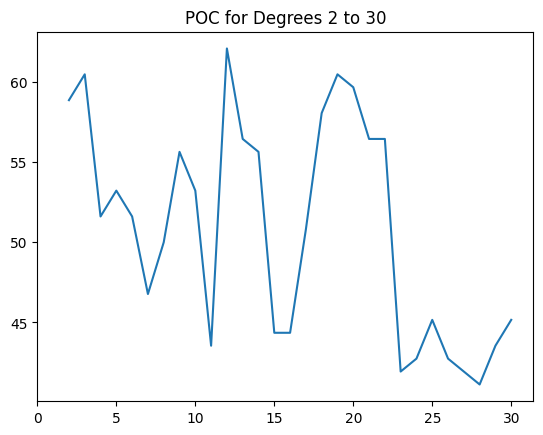

In [23]:
plt.plot(deg, ps)
plt.title("POC for Degrees 2 to 30")
plt.xticks([0,5,10,15,20,25,30])
plt.show()

In [24]:
plt.plot(deg, rs)
plt.title("RMSE for Degrees 2 to 30")
plt.xticks([0,5,10,15,20,25,30])
plt.show()

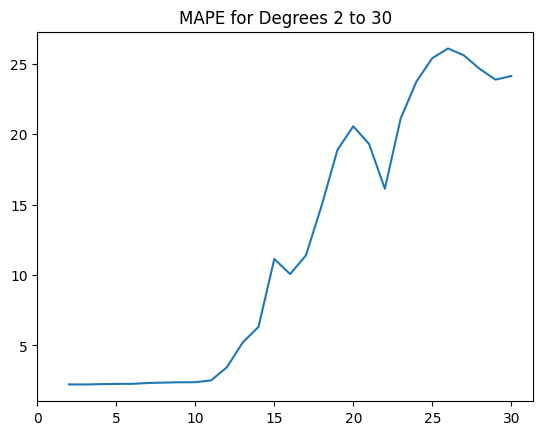

In [25]:
plt.plot(deg, ms)
plt.title("MAPE for Degrees 2 to 30")
plt.xticks([0,5,10,15,20,25,30])
plt.show()

Advanced Micro Devices (TICKR: KO)

10Y Data - 1Mo Prediction
RMSE: 1.0255705339099415
MAPE: 3.546014888630431
POC: 66.66666666666666
Execution Time: 0.027065753936767578 seconds 

10Y Data - 6Mo Prediction
RMSE: 1.3801837772103154
MAPE: 3.4556375893632927
POC: 62.096774193548384
Execution Time: 0.010452747344970703 seconds 

5Y Data - 1Mo Prediction
RMSE: 0.9708622705400808
MAPE: 3.559615540536385
POC: 57.14285714285714
Execution Time: 0.023637056350708008 seconds 

5Y Data - 6Mo Prediction
RMSE: 1.209379465879352
MAPE: 3.070315182760219
POC: 61.29032258064516
Execution Time: 0.011069774627685547 seconds 



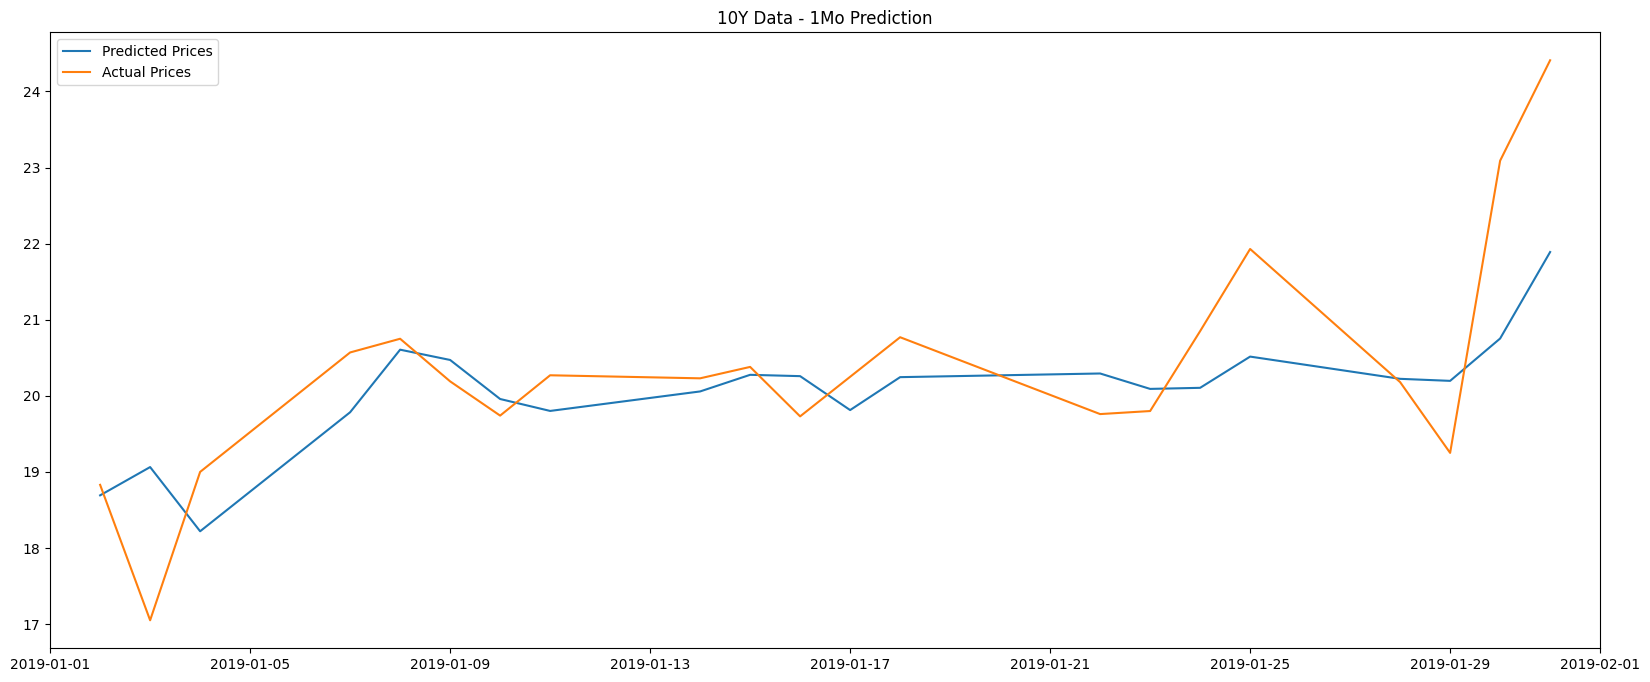

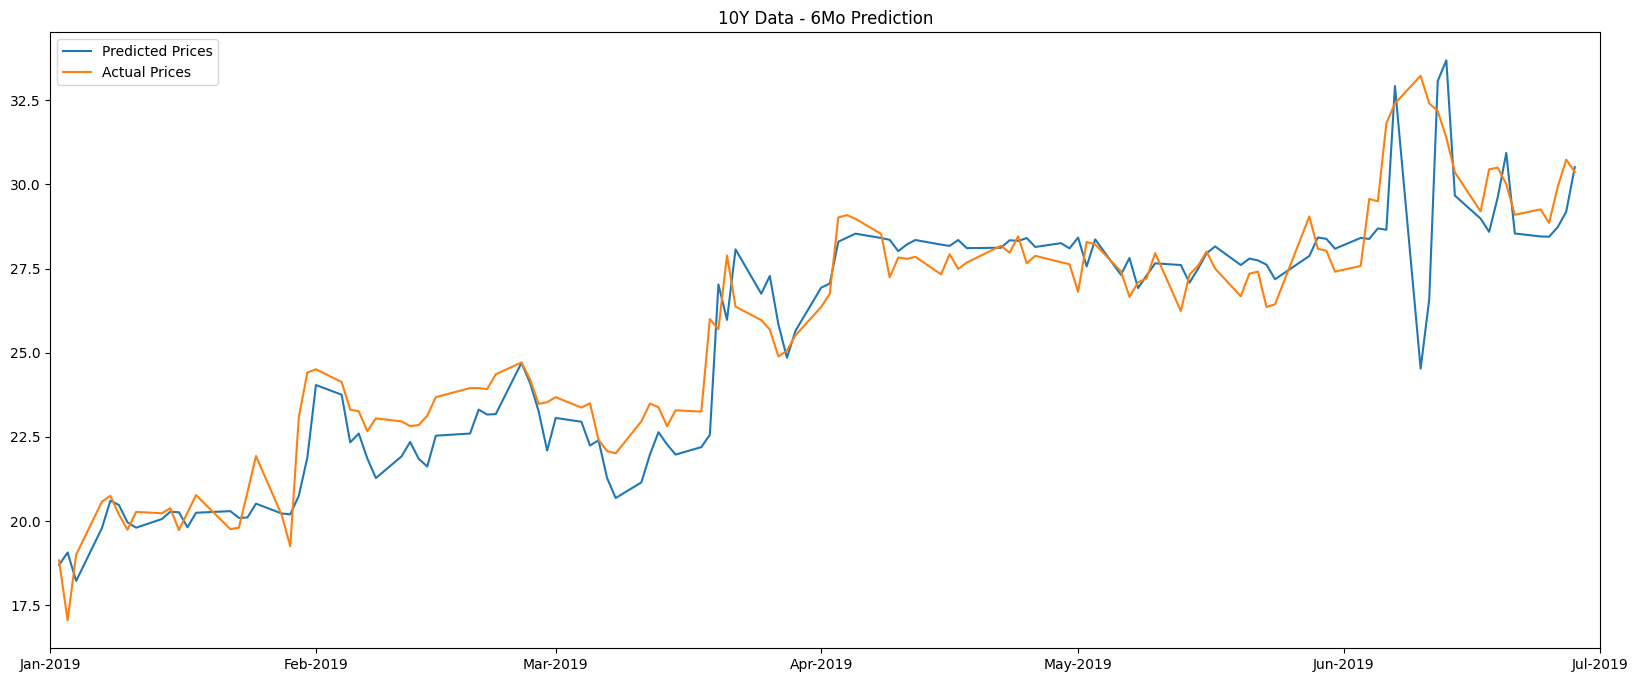

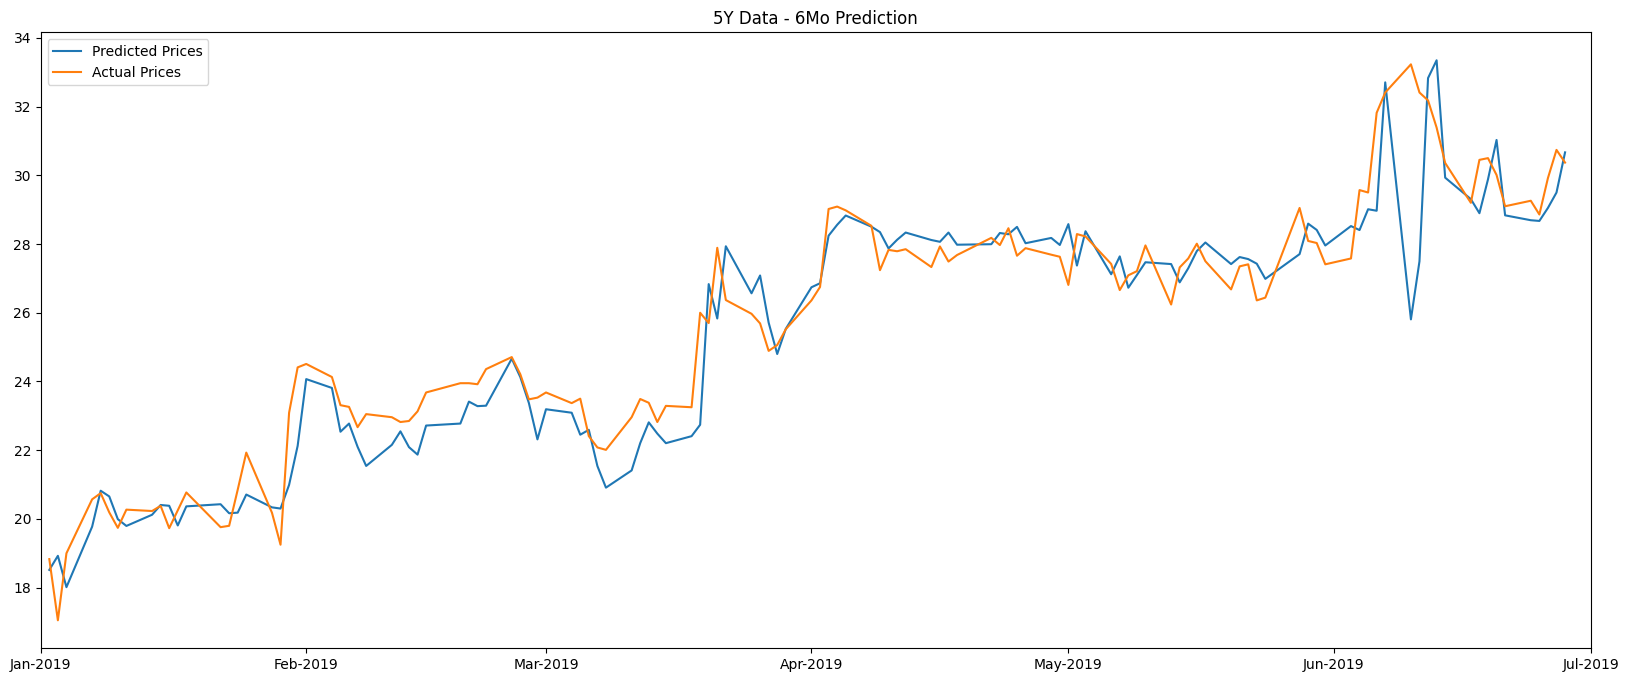

In [26]:
poly = PolynomialFeatures(12, include_bias = False)
lr = LinearRegression()
y_tests, y_preds, rmses, mapes, pocs, times = poly_run(AMD_trains, AMD_tests, poly, lr)
print_perf(y_tests, y_preds, rmses, mapes, pocs, times, "Advanced Micro Devices (TICKR: KO)")

# Decision Tree & Random Forest Regression

In [15]:
from sklearn.tree import DecisionTreeRegressor

### KO Stock

Coca-Cola (TICKR: KO)

10Y Data - 1Mo Prediction
RMSE: 0.56475083718175
MAPE: 0.9139356582600721
POC: 52.38095238095239
Execution Time: 0.014540672302246094 seconds 

10Y Data - 6Mo Prediction
RMSE: 0.8955460010420015
MAPE: 1.3181874444469044
POC: 50.806451612903224
Execution Time: 0.008988142013549805 seconds 

5Y Data - 1Mo Prediction
RMSE: 0.56475083718175
MAPE: 0.9139356582600721
POC: 52.38095238095239
Execution Time: 0.0 seconds 

5Y Data - 6Mo Prediction
RMSE: 0.8955460010420015
MAPE: 1.3181874444469046
POC: 50.806451612903224
Execution Time: 0.012779712677001953 seconds 



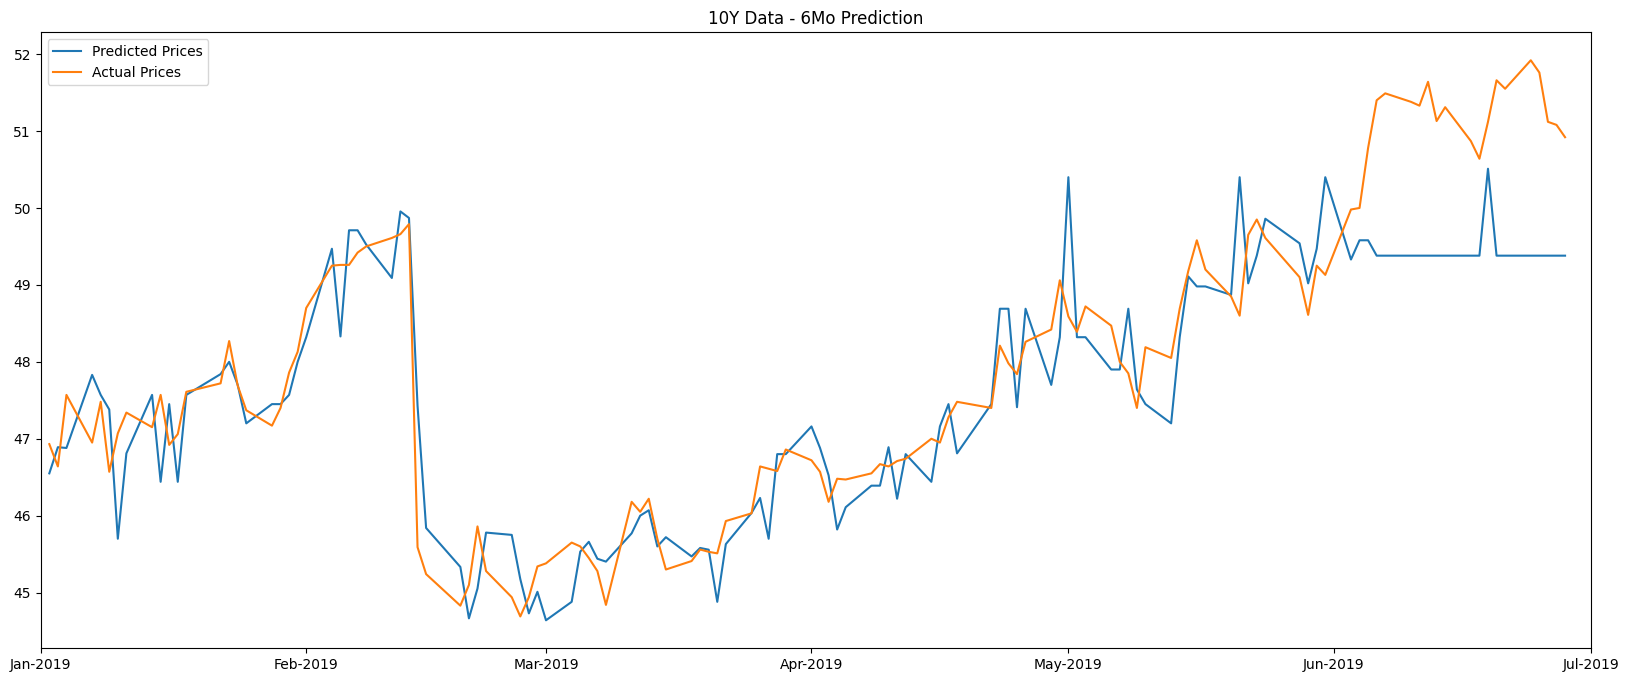

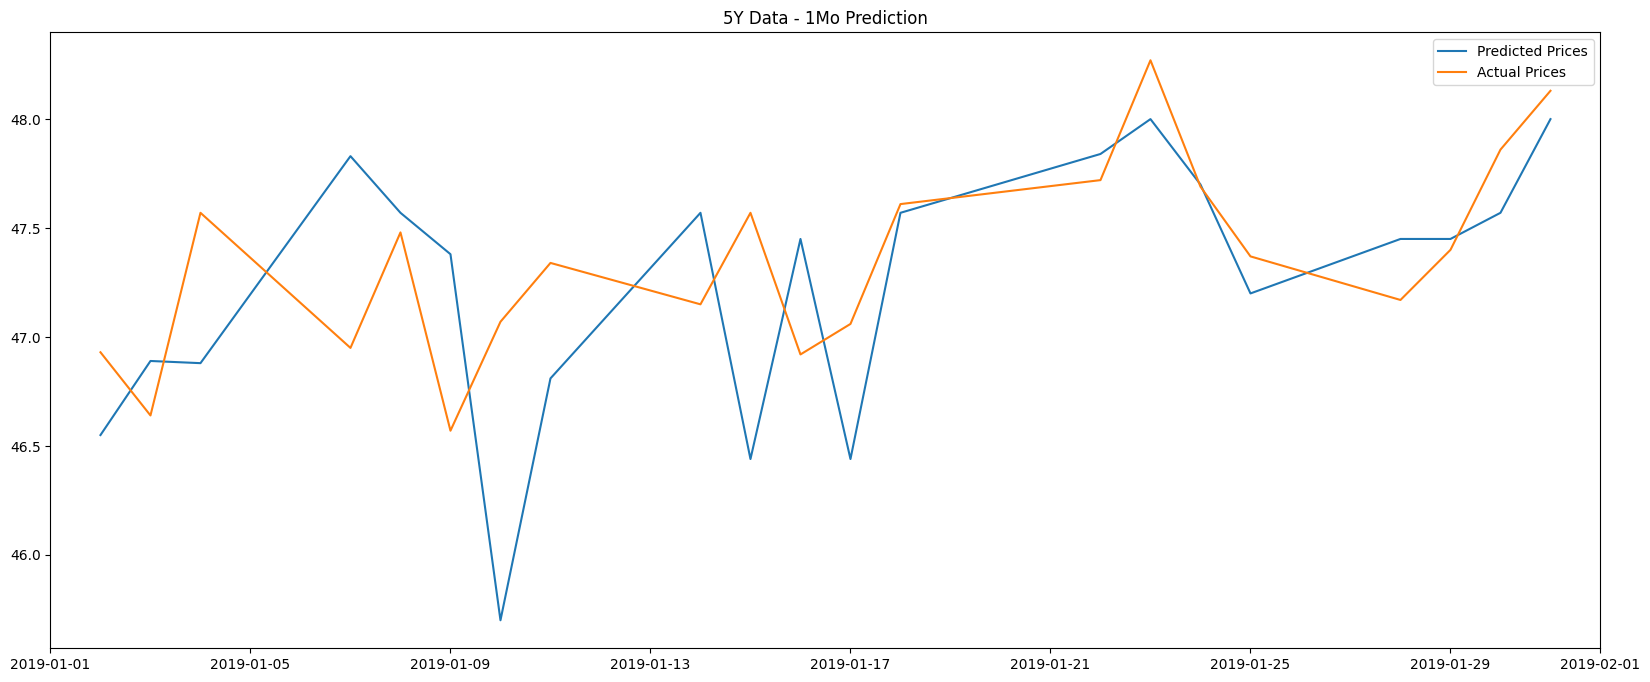

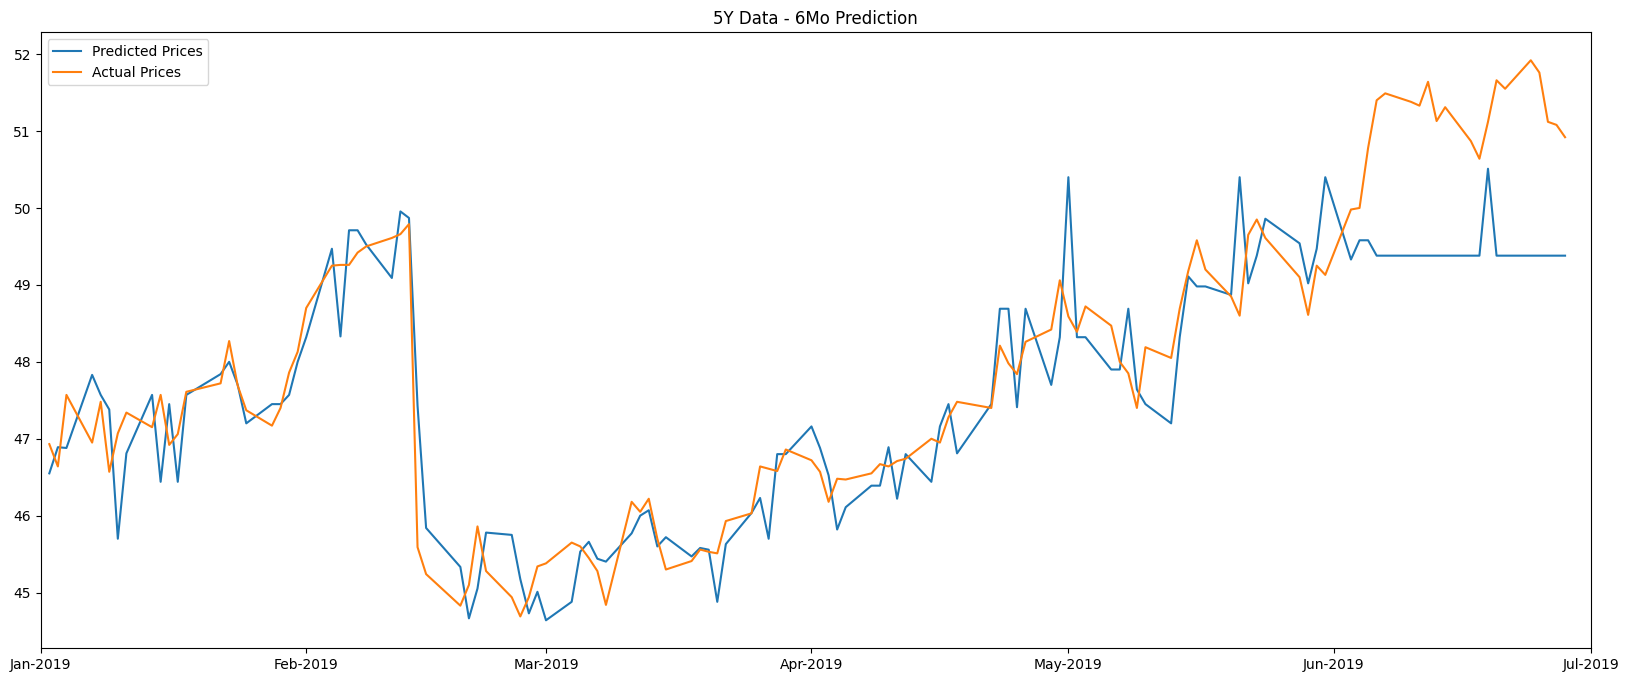

In [16]:
# Using MSE Criteria - MSE performed better than MAE

dtr = DecisionTreeRegressor(criterion = 'squared_error', random_state = 0)
y_tests, y_preds, rmses, mapes, pocs, times = run(KO_trains, KO_tests, dtr)
print_perf(y_tests, y_preds, rmses, mapes, pocs, times, "Coca-Cola (TICKR: KO)")

### AMD Stock

In [17]:
dtr = DecisionTreeRegressor(criterion = 'squared_error', random_state = 0)
y_tests, y_preds, rmses, mapes, pocs, times = run(AMD_trains, AMD_tests, dtr)
print_perf(y_tests, y_preds, rmses, mapes, pocs, times, "Advanced Micro Devices (TICKR: KO)")

Advanced Micro Devices (TICKR: KO)

10Y Data - 1Mo Prediction
RMSE: 1.3302306520372702
MAPE: 5.478613981393467
POC: 57.14285714285714
Execution Time: 0.015173196792602539 seconds 

10Y Data - 6Mo Prediction
RMSE: 1.6320280981731443
MAPE: 5.277058895584079
POC: 50.0
Execution Time: 0.00848078727722168 seconds 

5Y Data - 1Mo Prediction
RMSE: 1.3302306520372702
MAPE: 5.478613981393467
POC: 57.14285714285714
Execution Time: 0.006631135940551758 seconds 

5Y Data - 6Mo Prediction
RMSE: 1.6320280981731443
MAPE: 5.277058895584079
POC: 50.0
Execution Time: 0.006608009338378906 seconds 



# Support Vector Regression

In [16]:
#Polynomial Kernel

from sklearn.svm import SVR

svr_model_rbf = SVR(kernel = 'rbf')
svr_model_lin = SVR(kernel = 'linear')
svr_model_poly = SVR(kernel = 'poly')
svr_model_sig = SVR(kernel = 'sigmoid')

print("RBF")
y_tests, y_preds, rmses, mapes, pocs, times = run(KO_trains, KO_tests, svr_model_rbf)
print_perf(y_tests, y_preds, rmses, mapes, pocs, times, "Coca-Cola (TICKR: KO)", plots = False)

print("\n Linear")
y_tests, y_preds, rmses, mapes, pocs, times = run(KO_trains, KO_tests, svr_model_lin)
print_perf(y_tests, y_preds, rmses, mapes, pocs, times, "Coca-Cola (TICKR: KO)", plots = False)

print("\n Poly")
y_tests, y_preds, rmses, mapes, pocs, times = run(KO_trains, KO_tests, svr_model_poly)
print_perf(y_tests, y_preds, rmses, mapes, pocs, times, "Coca-Cola (TICKR: KO)", plots = False)

print("\n Sigmoid")
y_tests, y_preds, rmses, mapes, pocs, times = run(KO_trains, KO_tests, svr_model_sig)
print_perf(y_tests, y_preds, rmses, mapes, pocs, times, "Coca-Cola (TICKR: KO)", plots = False)

RBF
Coca-Cola (TICKR: KO)

10Y Data - 1Mo Prediction
RMSE: 0.39608835501595535
MAPE: 0.6927421093519939
POC: 57.14285714285714
Execution Time: 0.33083462715148926 seconds 

10Y Data - 6Mo Prediction
RMSE: 1.1061829722178969
MAPE: 1.3867578815049995
POC: 46.774193548387096
Execution Time: 0.30854249000549316 seconds 

5Y Data - 1Mo Prediction
RMSE: 0.4297447693546757
MAPE: 0.7435485454226983
POC: 47.61904761904761
Execution Time: 0.08479428291320801 seconds 

5Y Data - 6Mo Prediction
RMSE: 1.3488592686328433
MAPE: 1.4385393770777835
POC: 50.806451612903224
Execution Time: 0.1132192611694336 seconds 


 Linear
Coca-Cola (TICKR: KO)

10Y Data - 1Mo Prediction
RMSE: 0.4089744912127293
MAPE: 0.7106464597413487
POC: 57.14285714285714
Execution Time: 1.616194486618042 seconds 

10Y Data - 6Mo Prediction
RMSE: 0.3634769278329339
MAPE: 0.5809487877600853
POC: 53.2258064516129
Execution Time: 1.4740970134735107 seconds 

5Y Data - 1Mo Prediction
RMSE: 0.4091882651563418
MAPE: 0.7116413296485269


### KO Stock

Coca-Cola (TICKR: KO)

10Y Data - 1Mo Prediction
RMSE: 0.4089744912127293
MAPE: 0.7106464597413487
POC: 57.14285714285714
Execution Time: 1.3693299293518066 seconds 

10Y Data - 6Mo Prediction
RMSE: 0.3634769278329339
MAPE: 0.5809487877600853
POC: 53.2258064516129
Execution Time: 1.3901305198669434 seconds 

5Y Data - 1Mo Prediction
RMSE: 0.4091882651563418
MAPE: 0.7116413296485269
POC: 57.14285714285714
Execution Time: 0.17341828346252441 seconds 

5Y Data - 6Mo Prediction
RMSE: 0.36371942839722643
MAPE: 0.5814912835930774
POC: 53.2258064516129
Execution Time: 0.17805767059326172 seconds 



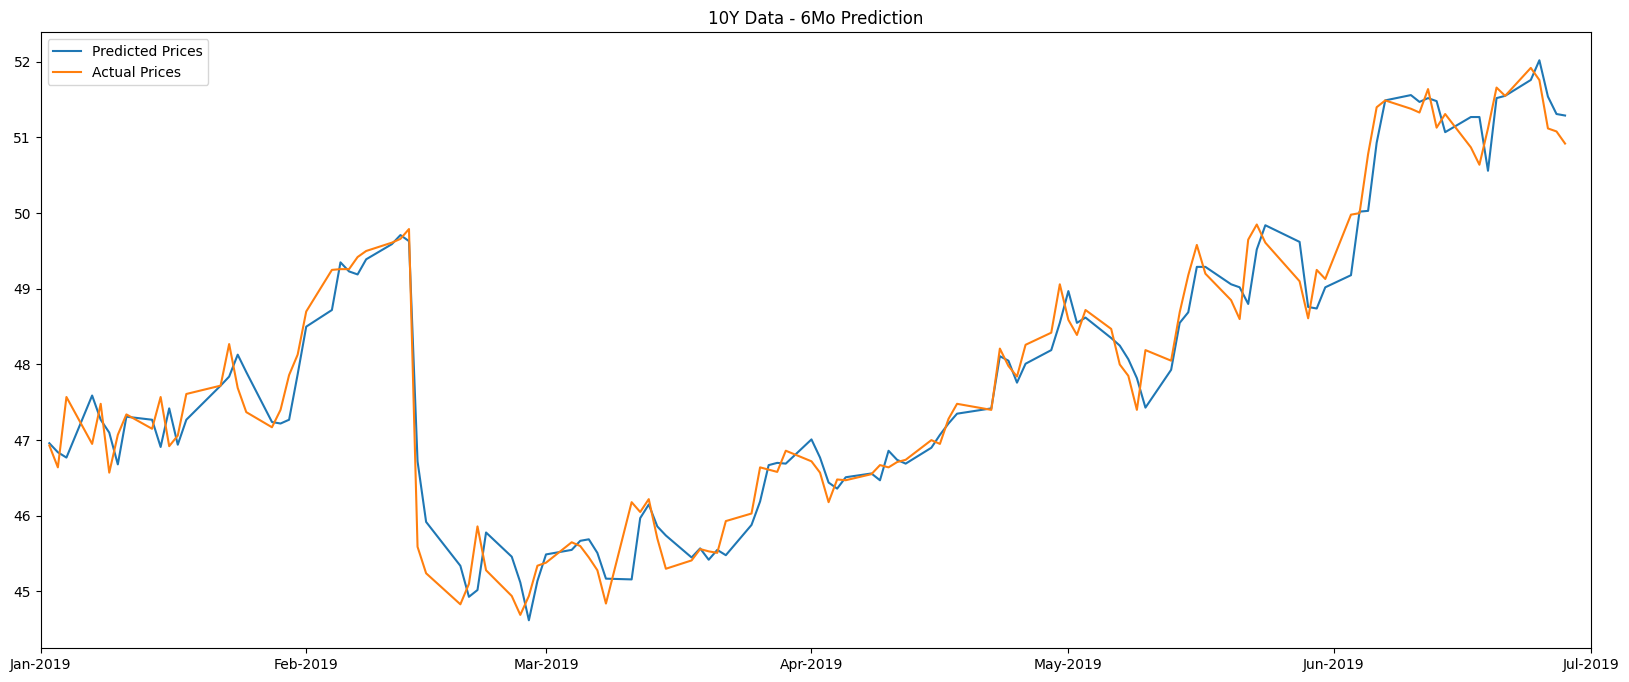

In [18]:
svr_linear = SVR(kernel = 'linear')
y_tests, y_preds, rmses, mapes, pocs, times = run(KO_trains, KO_tests, svr_linear)
print_perf(y_tests, y_preds, rmses, mapes, pocs, times, "Coca-Cola (TICKR: KO)")

### AMD Stock

Advanced Micro Devices (TICKR: KO)

10Y Data - 1Mo Prediction
RMSE: 0.8807099578127575
MAPE: 3.681525158282307
POC: 47.61904761904761
Execution Time: 0.9653646945953369 seconds 

10Y Data - 6Mo Prediction
RMSE: 0.7516208905980096
MAPE: 2.280320299341158
POC: 58.87096774193549
Execution Time: 0.9903445243835449 seconds 

5Y Data - 1Mo Prediction
RMSE: 0.8798552951481836
MAPE: 3.681119219840967
POC: 47.61904761904761
Execution Time: 0.4546544551849365 seconds 

5Y Data - 6Mo Prediction
RMSE: 0.7514319156355149
MAPE: 2.2813741166314156
POC: 58.87096774193549
Execution Time: 0.45465660095214844 seconds 



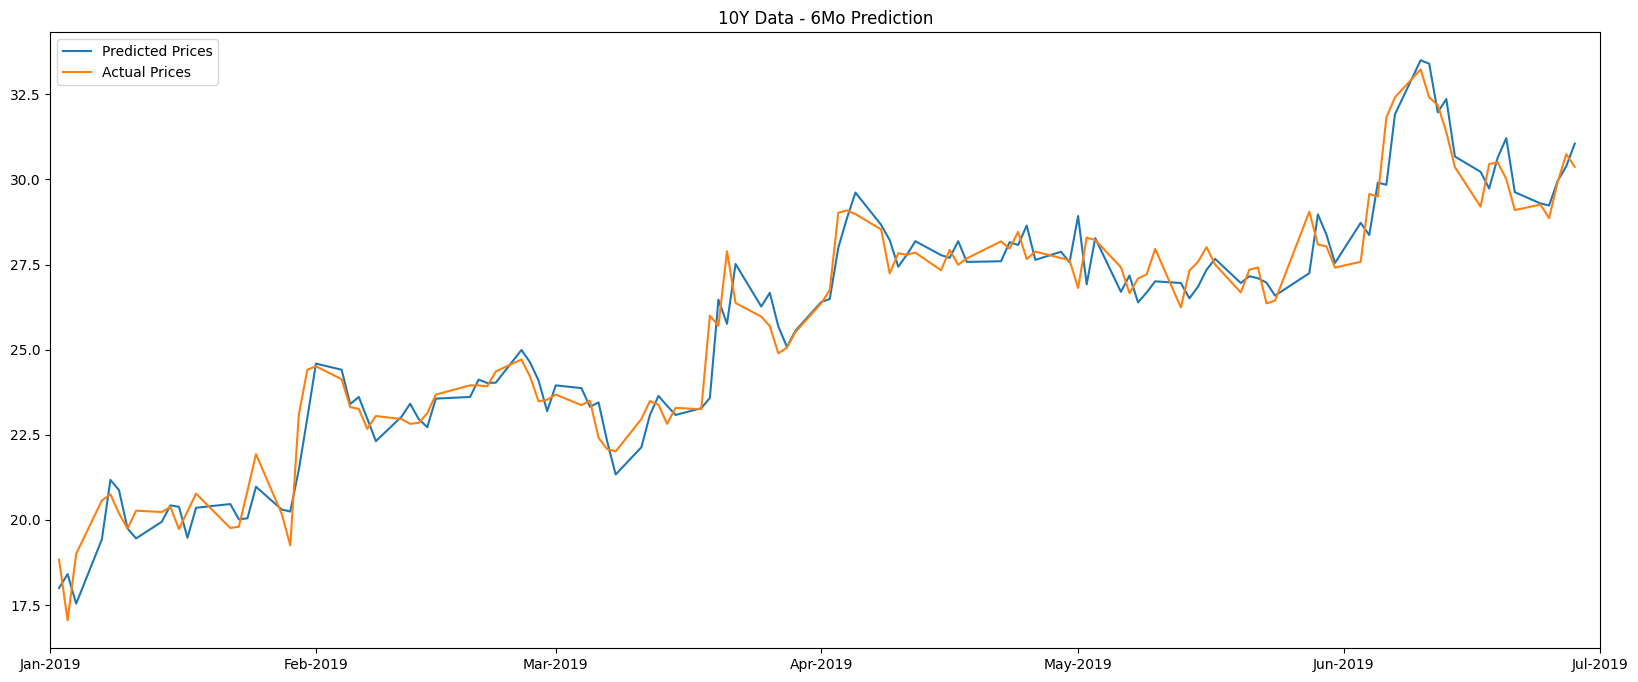

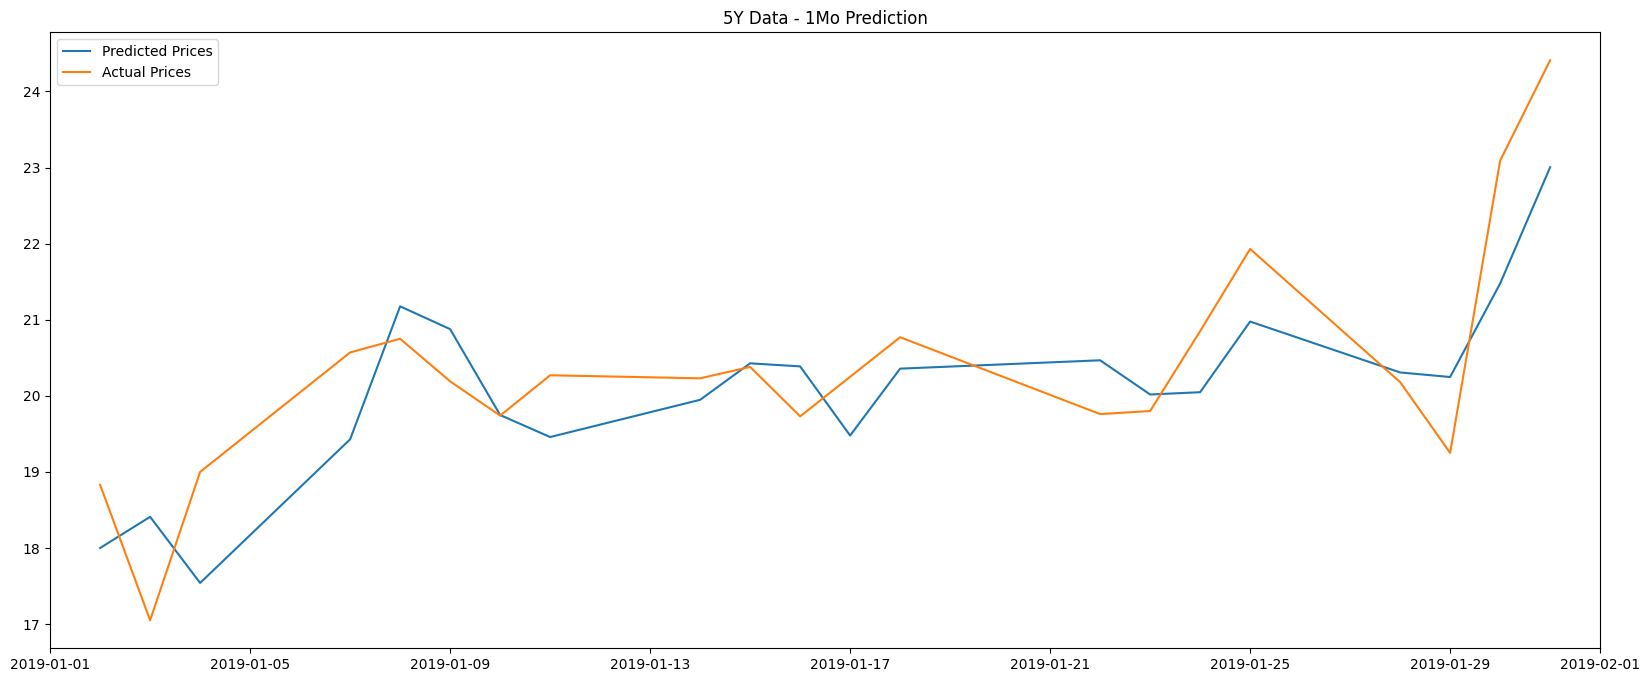

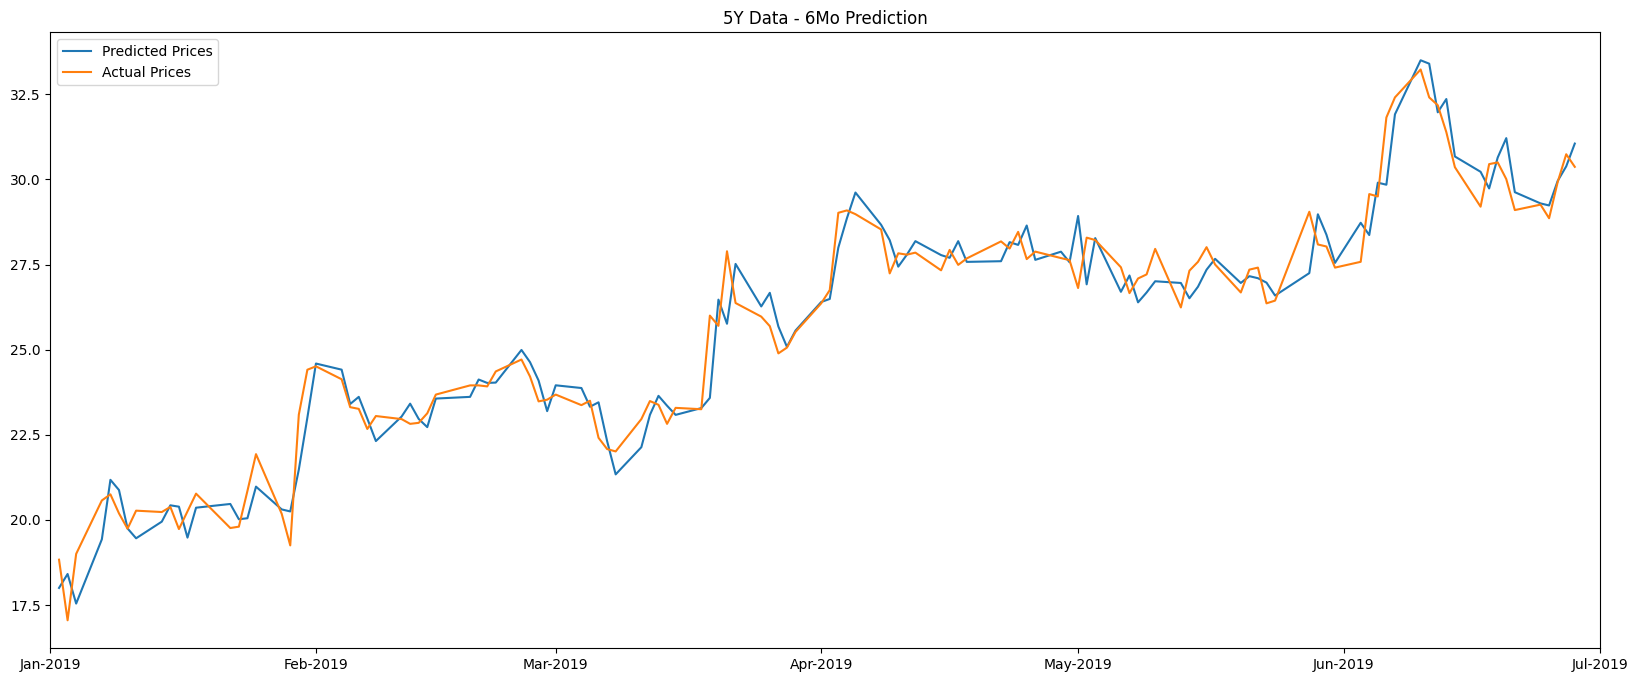

In [17]:
svr_linear = SVR(kernel = 'linear')
y_tests, y_preds, rmses, mapes, pocs, times = run(AMD_trains, AMD_tests, svr_linear)
print_perf(y_tests, y_preds, rmses, mapes, pocs, times, "Advanced Micro Devices (TICKR: KO)")

# Quantile Regression

In [8]:
from sklearn.linear_model import QuantileRegressor

In [25]:
quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
rs = []
ms = []
ps = []
for i in quantiles:
    
    qr = QuantileRegressor(quantile = i, solver = 'highs')
    y_tests, y_preds, rmses, mapes, pocs, times = run(KO_trains, KO_tests, qr)
    rs.append(rmses[1])
    ms.append(mapes[1])
    ps.append(pocs[1])

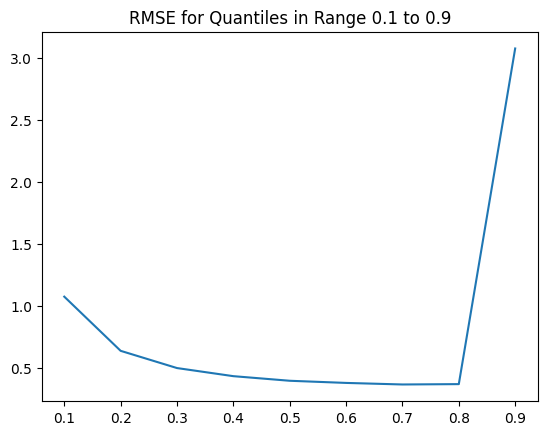

In [26]:
plt.plot(quantiles, rs)
plt.title("RMSE for Quantiles in Range 0.1 to 0.9")
#plt.xticks([0,5,10,15,20,25,30])
plt.show()

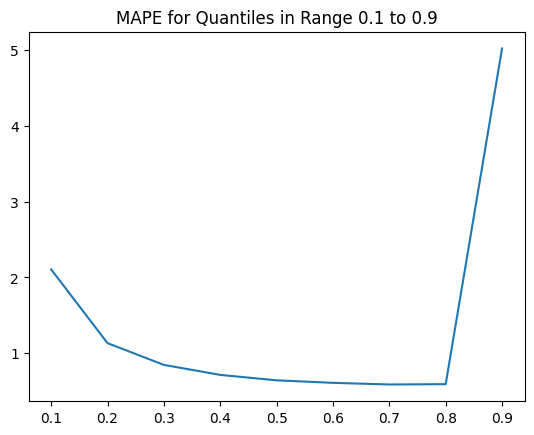

In [27]:
plt.plot(quantiles, ms)
plt.title("MAPE for Quantiles in Range 0.1 to 0.9")
#plt.xticks([0,5,10,15,20,25,30])
plt.show()

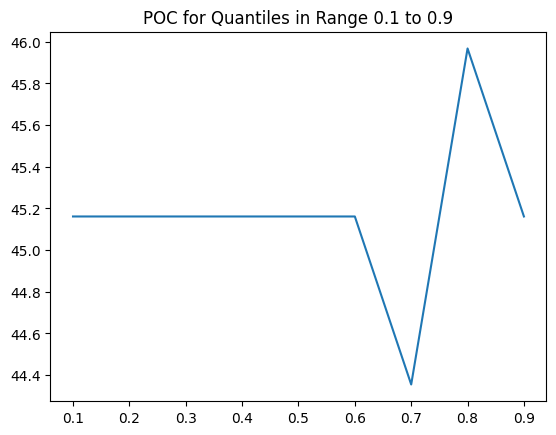

In [28]:
plt.plot(quantiles, ps)
plt.title("POC for Quantiles in Range 0.1 to 0.9")
#plt.xticks([0,5,10,15,20,25,30])
plt.show()

### KO Stock

Coca-Cola (TICKR: KO)

10Y Data - 1Mo Prediction
RMSE: 0.4057327633921387
MAPE: 0.7103634088026122
POC: 57.14285714285714
Execution Time: 0.34327149391174316 seconds 

10Y Data - 6Mo Prediction
RMSE: 0.3709180584111148
MAPE: 0.592911132727945
POC: 45.96774193548387
Execution Time: 0.2472846508026123 seconds 

5Y Data - 1Mo Prediction
RMSE: 1.8871308024923619
MAPE: 3.8682451335735584
POC: 42.857142857142854
Execution Time: 0.08314752578735352 seconds 

5Y Data - 6Mo Prediction
RMSE: 3.077217869513494
MAPE: 5.0210186430821135
POC: 45.16129032258064
Execution Time: 0.05753946304321289 seconds 



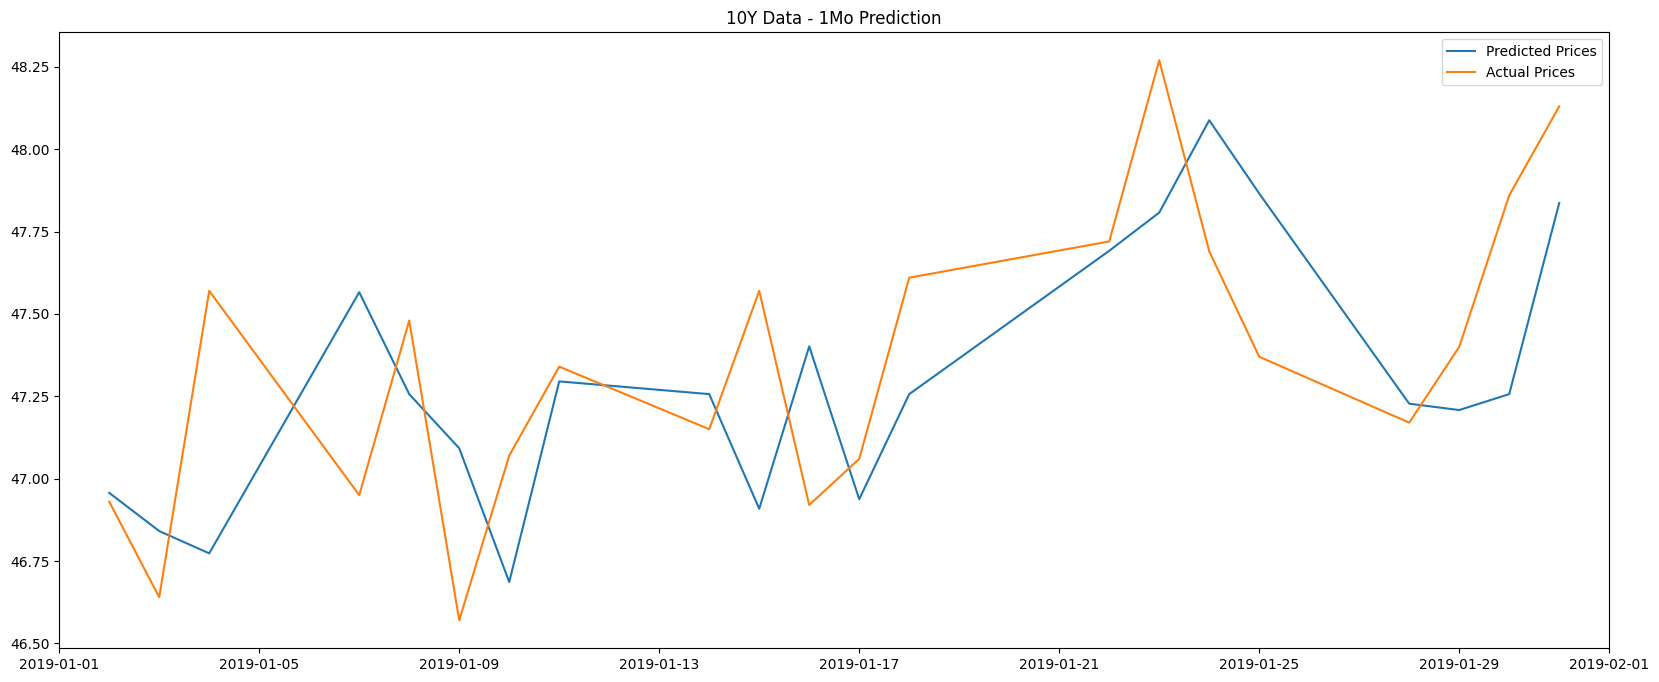

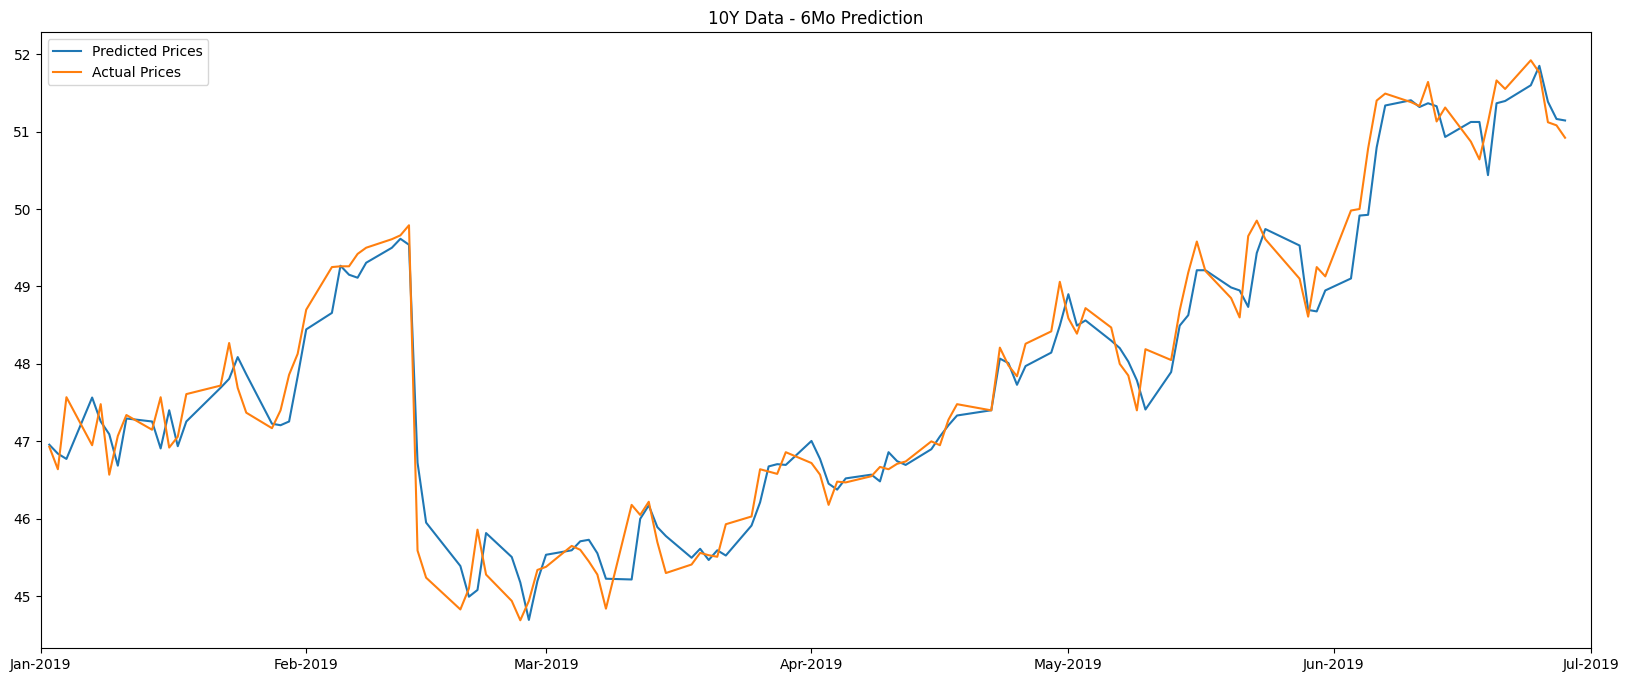

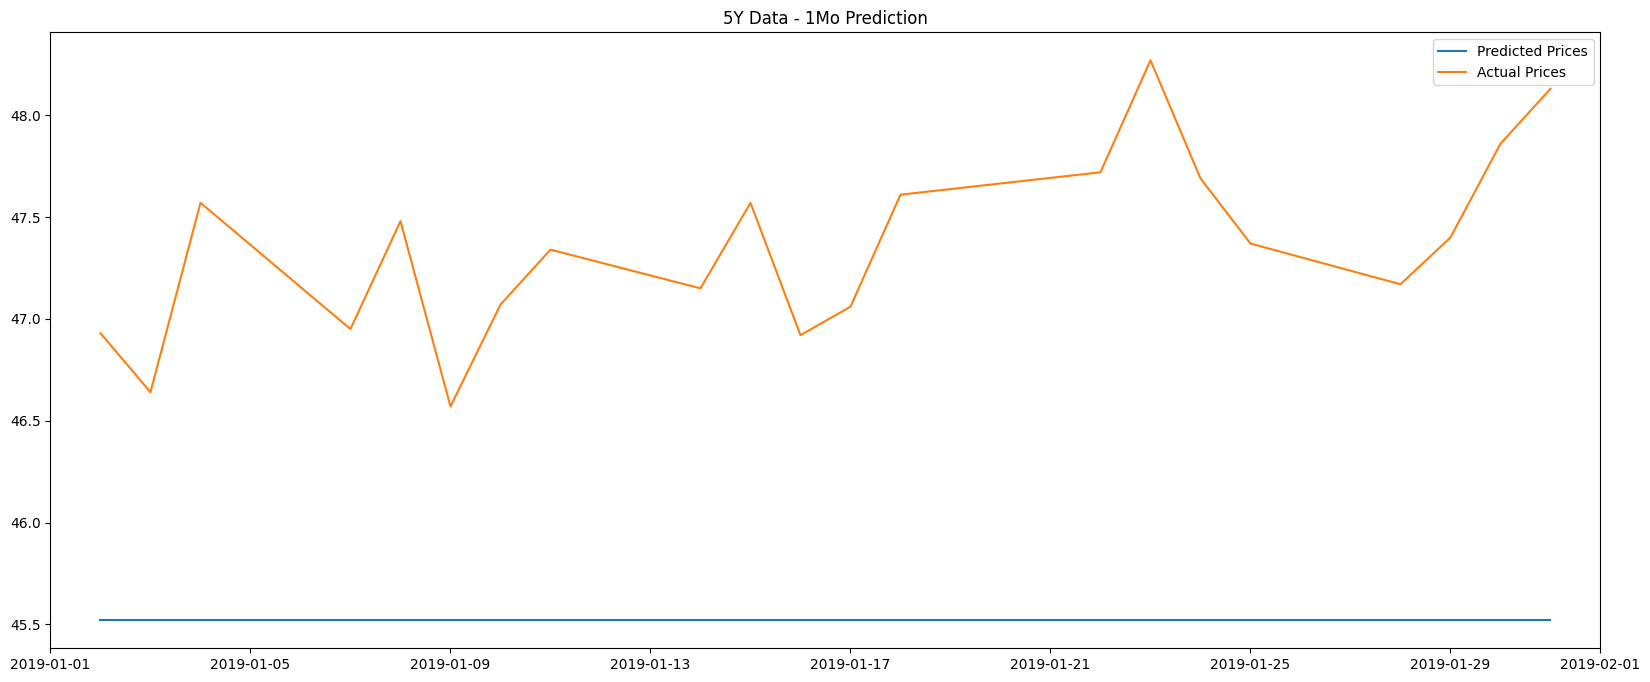

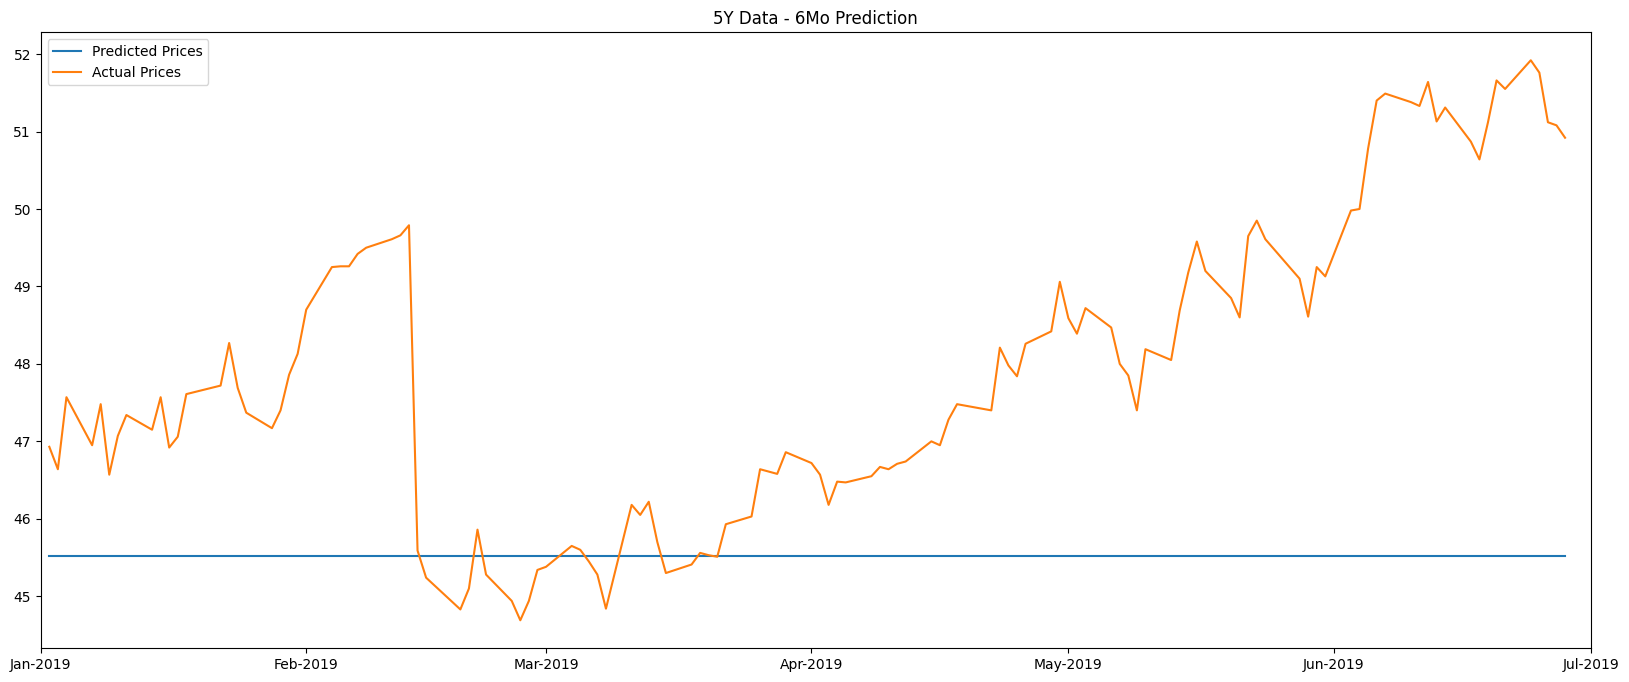

In [11]:
qr = QuantileRegressor(quantile = 0.8, solver = 'highs')
y_tests, y_preds, rmses, mapes, pocs, times = run(KO_trains, KO_tests, qr)
print_perf(y_tests, y_preds, rmses, mapes, pocs, times, "Coca-Cola (TICKR: KO)")

### AMD Stock

Advanced Micro Devices (TICKR: KO)

10Y Data - 1Mo Prediction
RMSE: 0.9837013257326327
MAPE: 3.9749127393754193
POC: 47.61904761904761
Execution Time: 0.3021275997161865 seconds 

10Y Data - 6Mo Prediction
RMSE: 0.8557978626393595
MAPE: 2.544097573220265
POC: 58.87096774193549
Execution Time: 0.31357336044311523 seconds 

5Y Data - 1Mo Prediction
RMSE: 0.8645549857687996
MAPE: 3.671511734924239
POC: 52.38095238095239
Execution Time: 0.09691500663757324 seconds 

5Y Data - 6Mo Prediction
RMSE: 0.7474891755626494
MAPE: 2.295006817459442
POC: 54.83870967741935
Execution Time: 0.08994197845458984 seconds 



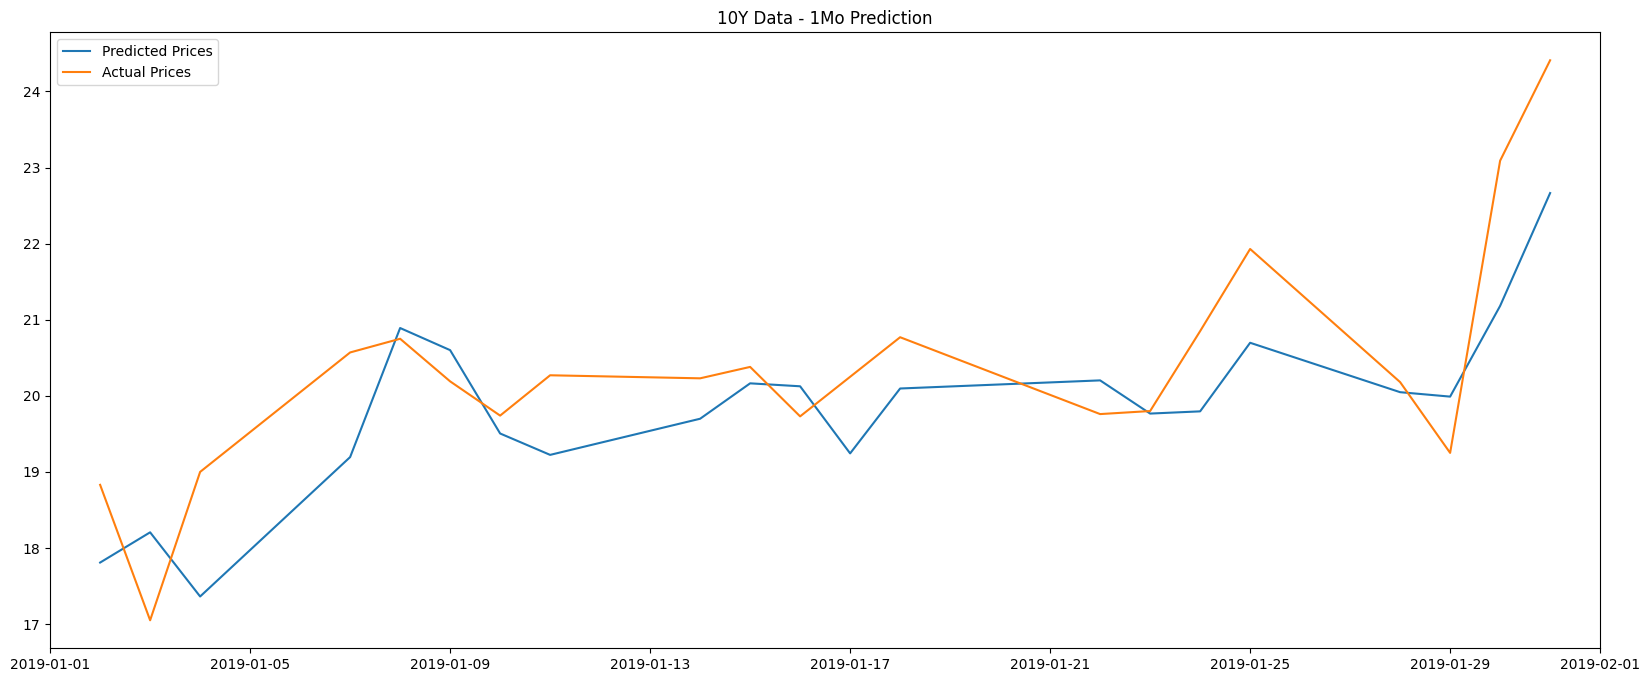

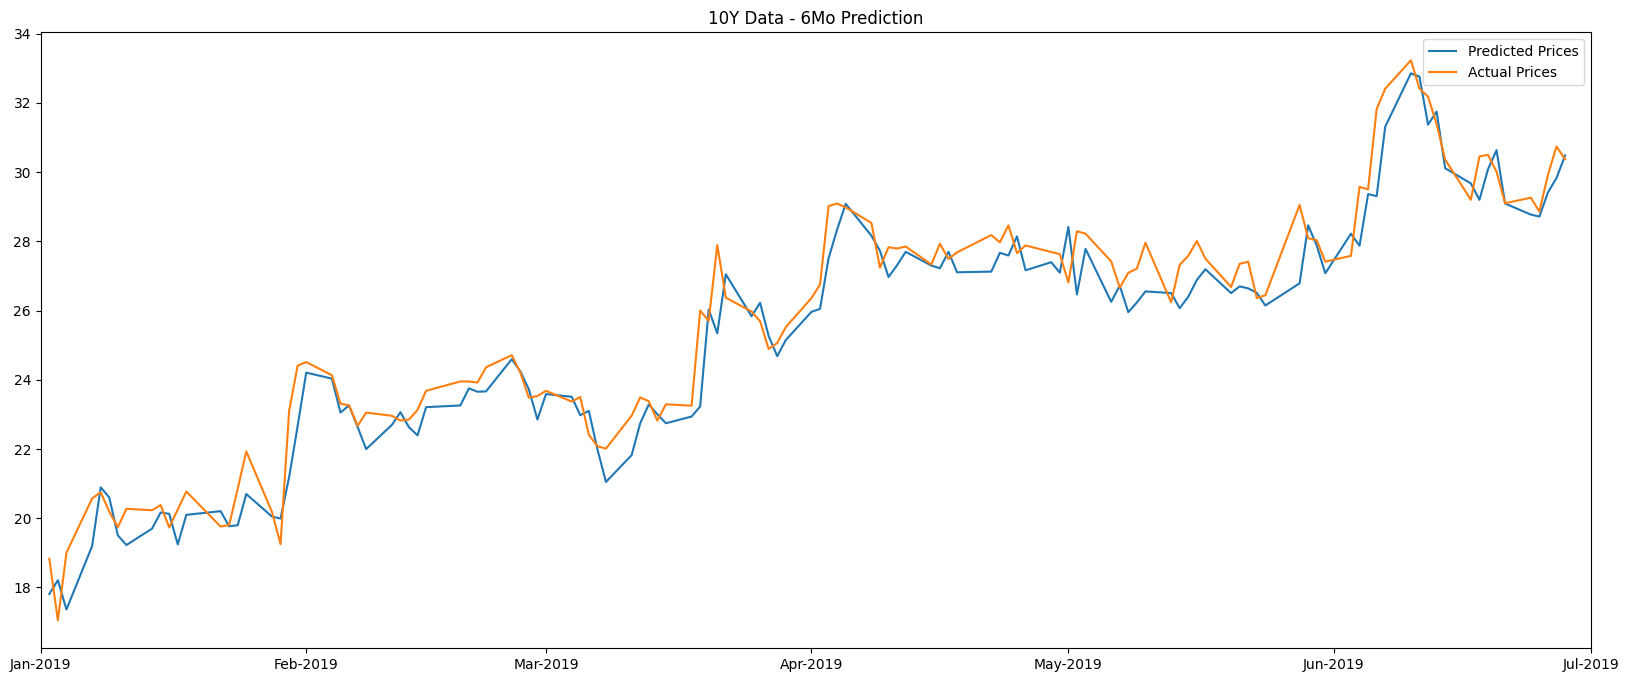

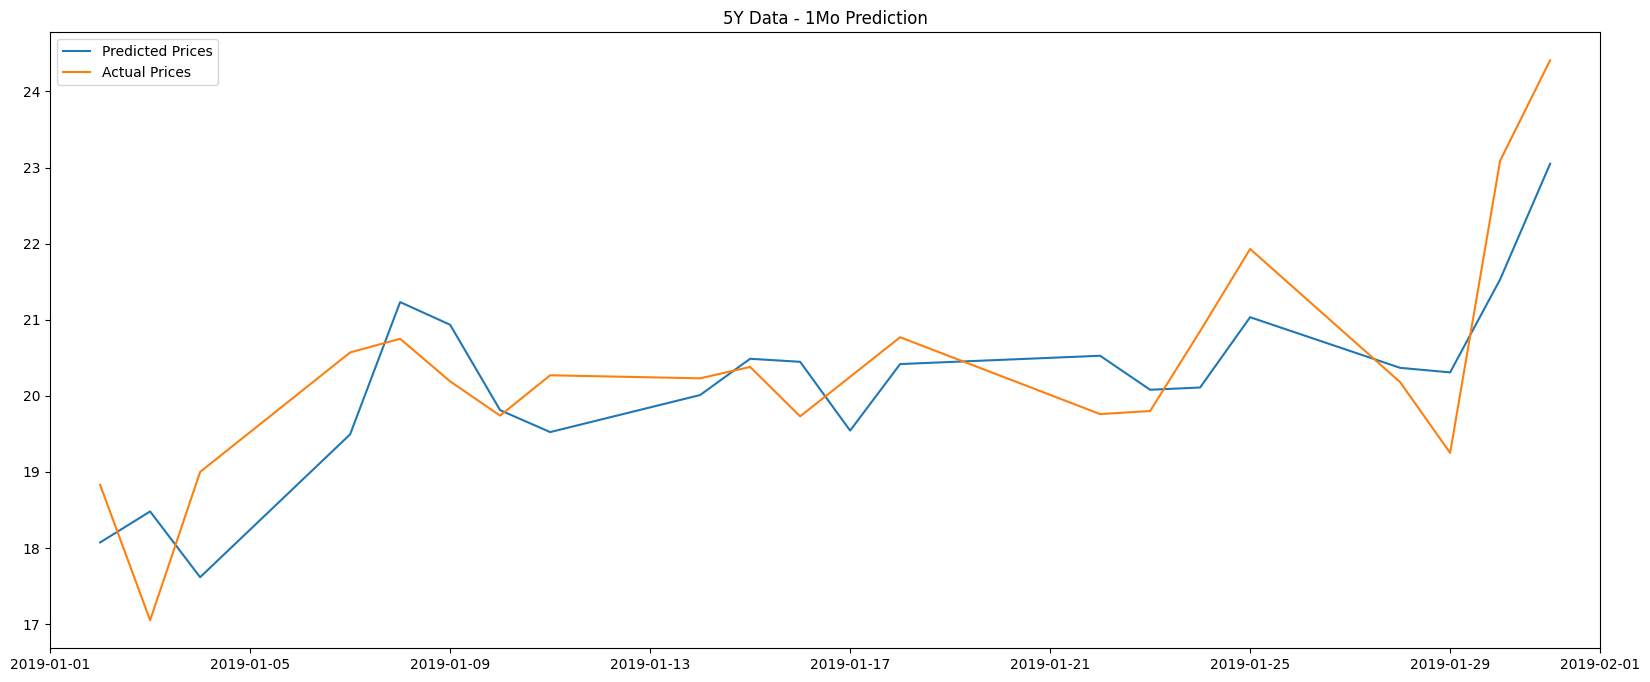

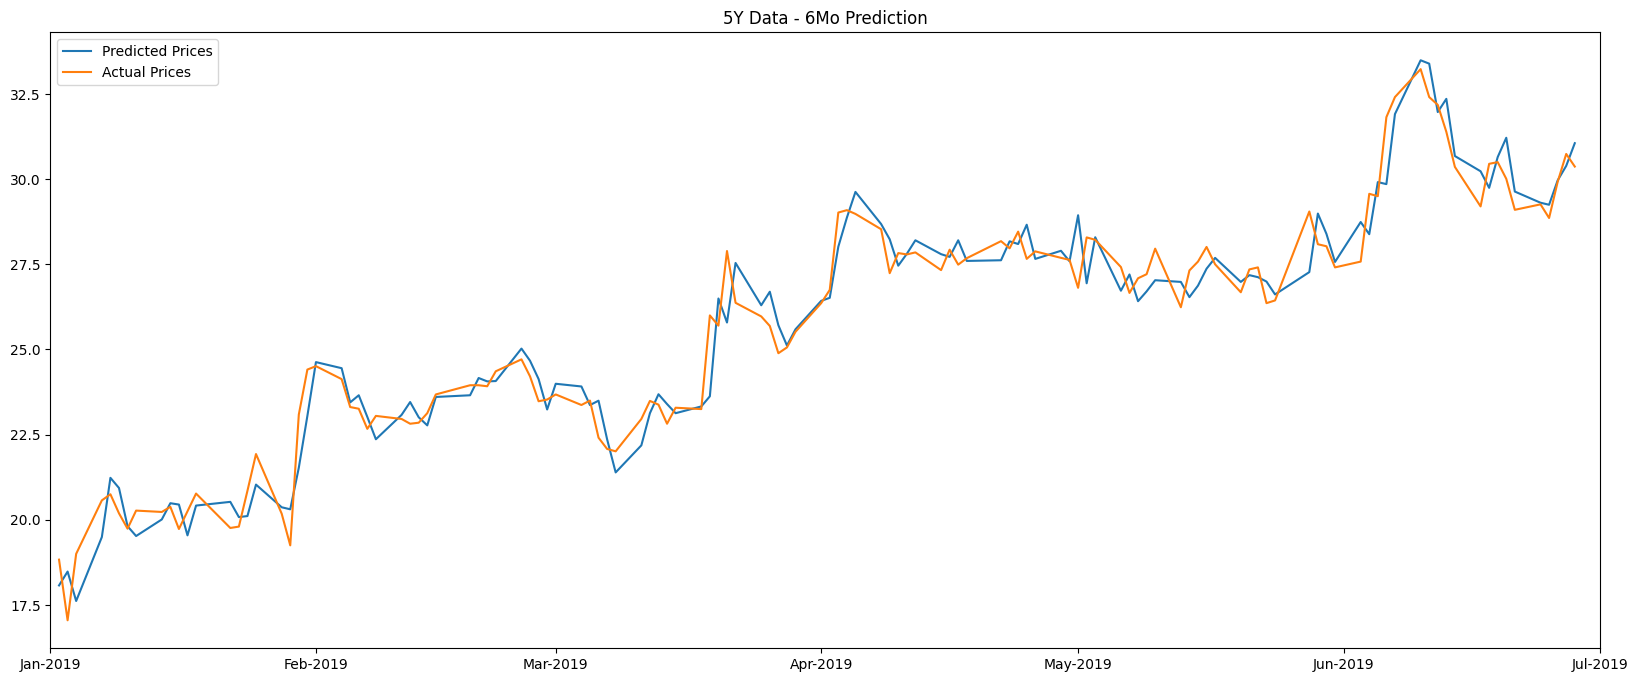

In [22]:
qr = QuantileRegressor(quantile = 0.8, solver = 'highs')
y_tests, y_preds, rmses, mapes, pocs, times = run(AMD_trains, AMD_tests, qr)
print_perf(y_tests, y_preds, rmses, mapes, pocs, times, "Advanced Micro Devices (TICKR: KO)")